In [ ]:
import shap
import matplotlib.pyplot as plt
import torch
import torch as T
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import random
import numpy as np
import pandas as pd
import sys
sys.path.append("../../../")
import D3QN

device = T.device("cuda:0" if T.cuda.is_available() else "cpu")
# Enable the plots in jupyter
shap.initjs()

def parse(func,size=100):
    X, Y = [], []
    feature_names = list(func()[0].keys())
    print(feature_names)
    for _ in range(size):
        x, y = func()
        X.append(list(x.values()))
        Y.append(y)
        #print(x, y)
    return X,Y,feature_names

def load_data(filepath,count=None):
    X,Y = [],[]
    df = pd.read_csv(filepath)
    for i in range(len(df)):
        obs = df.iloc[i, 0:-1].to_dict()
        label = df.iloc[i, -1]
        X.append(list(obs.values()))
        Y.append(label)
        feature_names = list(obs.keys())
    print(feature_names)
    if count is None:
        count = len(X)
    return X[:count],Y[:count],feature_names

In [ ]:

class DuelingDeepQNetwork(nn.Module):
    def __init__(self, alpha, state_dim, action_dim, fc1_dim, fc2_dim):
        super(DuelingDeepQNetwork, self).__init__()

        self.fc1 = nn.Linear(state_dim, fc1_dim)
        self.fc2 = nn.Linear(fc1_dim, fc2_dim)
        self.V = nn.Linear(fc2_dim, 1)
        self.A = nn.Linear(fc2_dim, action_dim)

        self.optimizer = optim.Adam(self.parameters(), lr=alpha)
        self.to(device)

    def forward(self, state):
        x = T.relu(self.fc1(state))
        x = T.relu(self.fc2(x))

        V = self.V(x)
        A = self.A(x)
        Q = V + A - T.mean(A, dim=-1, keepdim=True)

        return Q

    def save(self, file_path):
        T.save(self, file_path)


## cahce agent

In [57]:
import shap
import sklearn.neural_network
import matplotlib.pyplot as plt

X,Y,feature_names = load_data("./cache.csv")
actions = ["IDLE","L1","L2","L3"]
t = []
for i in Y:
    t.append(actions.index(i))
model = sklearn.neural_network.MLPClassifier().fit(X,t)

['es_load', 'free_storage_size_ratio_L1', 'free_storage_size_ratio_L2', 'free_storage_size_ratio_L3', 'can_L1_fit', 'can_L2_fit', 'can_L3_fit', 'service_size', 'estimated_fetch_time', 'is_popular', 'charm', 'service_request_frequency', 'nearby_servers_count', 'cached_in_nearby_servers', 'es_request_frequency']


(10, 15, 3)
[[ 0.01195793 -0.00659206 -0.00536588]
 [ 0.00941619 -0.00239952 -0.00701668]
 [-0.00688455  0.00470946  0.00217509]
 [-0.00385014  0.00242842  0.00142172]
 [-0.00497935  0.00157508  0.00340427]
 [-0.00166556  0.00212412 -0.00045855]
 [-0.00171303 -0.00123461  0.00294764]
 [-0.00236817  0.00214592  0.00022225]
 [-0.00131767  0.00058007  0.00073761]
 [-0.01013604  0.00567083  0.00446521]]


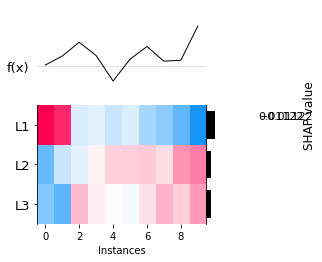

(10, 15, 3)
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


invalid value encountered in true_divide
invalid value encountered in true_divide


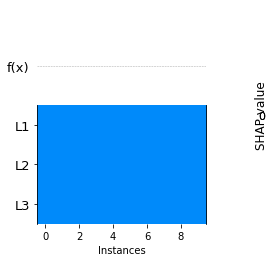

(10, 15, 3)
[[-2.32776531e-04  3.28207363e-03 -3.04929709e-03]
 [-5.65114920e-05  3.55650790e-03 -3.49999641e-03]
 [-1.64145113e-04  2.50570534e-03 -2.34156022e-03]
 [ 1.38487592e-04  2.07097205e-03 -2.20945965e-03]
 [-2.37931208e-04  3.42011508e-03 -3.18218387e-03]
 [ 7.22588870e-04  8.99039557e-05 -8.12492825e-04]
 [-1.62993908e-04 -2.27547314e-03  2.43846705e-03]
 [-8.98318669e-06 -3.50158357e-03  3.51056676e-03]
 [-1.01488946e-04 -4.11425400e-03  4.21574295e-03]
 [ 1.86318807e-04 -4.58984462e-03  4.40352581e-03]]


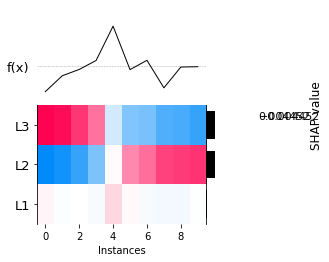

(10, 15, 3)
[[-3.26233563e-07  3.10255707e-05 -3.06993371e-05]
 [ 1.92304721e-07  1.91377675e-05 -1.93300723e-05]
 [-1.11554812e-06  2.95288607e-05 -2.84133126e-05]
 [ 8.28277236e-07  2.08222203e-05 -2.16504975e-05]
 [-2.87147673e-06  2.61133756e-05 -2.32418989e-05]
 [-3.04615972e-06  2.52244214e-05 -2.21782617e-05]
 [-2.65505109e-06  2.34334690e-05 -2.07784179e-05]
 [ 3.63018836e-06 -6.21530664e-05  5.85228780e-05]
 [ 2.29604547e-06 -5.22755855e-05  4.99795400e-05]
 [ 3.04706160e-06 -5.92437176e-05  5.61966560e-05]]


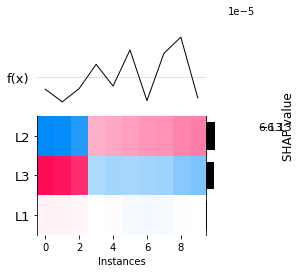

(10, 15, 3)
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


invalid value encountered in true_divide
invalid value encountered in true_divide


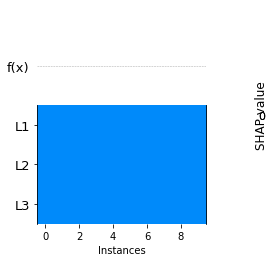

(10, 15, 3)
[[-1.79672278e-05  1.57112344e-04 -1.39145117e-04]
 [-1.58225903e-05  1.02201603e-04 -8.63790129e-05]
 [-1.40519387e-05  1.08163204e-04 -9.41112658e-05]
 [ 6.76871718e-07  1.15591667e-04 -1.16268538e-04]
 [-1.31914416e-05  8.41241334e-05 -7.09326918e-05]
 [-1.28346426e-07  1.21768400e-04 -1.21640054e-04]
 [-9.57629641e-06  1.32950576e-04 -1.23374279e-04]
 [ 4.09589117e-05 -2.48563967e-04  2.07605055e-04]
 [ 6.59989474e-07 -2.49741628e-04  2.49081638e-04]
 [ 2.69833140e-05 -2.66020566e-04  2.39037252e-04]]


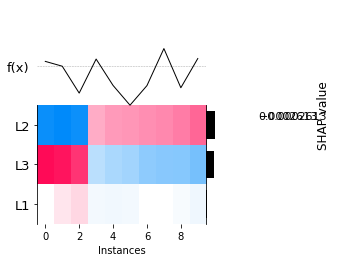

(10, 15, 3)
[[-6.00664777e-07  3.76931926e-05 -3.70925278e-05]
 [-2.30427354e-07  3.36876632e-05 -3.34572359e-05]
 [-4.43801931e-07  3.02953903e-05 -2.98515884e-05]
 [-1.01704349e-06  4.55457828e-05 -4.45287393e-05]
 [-4.34699369e-06  4.20422917e-05 -3.76952980e-05]
 [-8.58375479e-07  4.26053998e-05 -4.17470243e-05]
 [-3.85530975e-06  2.82722042e-05 -2.44168944e-05]
 [-2.63587001e-06  5.33642130e-05 -5.07283430e-05]
 [ 1.15760641e-05 -1.58673674e-04  1.47097610e-04]
 [ 2.21802035e-06 -1.44991576e-04  1.42773555e-04]]


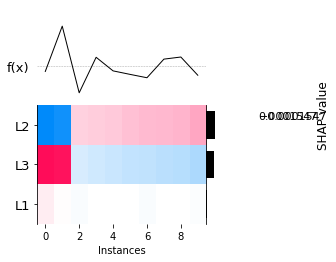

(10, 15, 3)
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


invalid value encountered in true_divide
invalid value encountered in true_divide


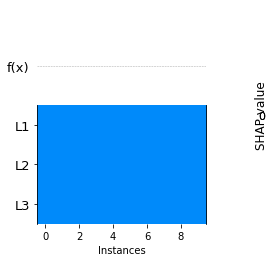

(10, 15, 3)
[[-2.92316331e-05  2.13268995e-04 -1.84037362e-04]
 [-2.92251519e-05  2.29881485e-04 -2.00656333e-04]
 [-1.72688368e-05  3.13749266e-04 -2.96480429e-04]
 [ 9.02725663e-06 -8.39328525e-05  7.49055959e-05]
 [ 1.28442242e-05 -8.52193094e-05  7.23750852e-05]
 [ 1.40220159e-05 -1.36842441e-04  1.22820425e-04]
 [ 8.85050333e-06 -1.19604121e-04  1.10753618e-04]
 [ 1.51206291e-05 -5.38725074e-05  3.87518783e-05]
 [ 1.33484054e-05 -9.92388836e-05  8.58904781e-05]
 [ 4.09077959e-06 -1.42609465e-04  1.38518686e-04]]


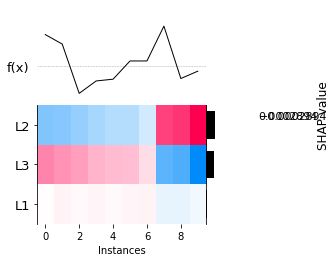

(10, 15, 3)
[[ 2.75636456e-04 -8.15691499e-05 -1.94067306e-04]
 [-1.76242800e-05  6.69648417e-06  1.09277958e-05]
 [-4.70666174e-05  1.28523392e-05  3.42142782e-05]
 [-1.81609385e-05  1.31854538e-05  4.97548472e-06]
 [-2.27612801e-05  7.15747556e-06  1.56038045e-05]
 [-7.21715022e-06 -7.24801365e-06  1.44651639e-05]
 [-2.01807246e-05 -3.15902010e-06  2.33397447e-05]
 [-1.91214736e-05  3.87329568e-06  1.52481779e-05]
 [-2.59861081e-05  1.28386112e-05  1.31474969e-05]
 [-2.80408528e-05  1.44633155e-06  2.65945213e-05]]


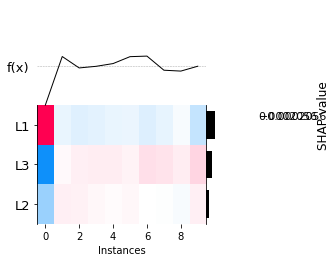

(10, 15, 3)
[[-6.53408021e-06  7.14045781e-05 -6.48704979e-05]
 [-2.39002979e-06  1.22904613e-04 -1.20514583e-04]
 [ 3.09560341e-06  8.92005311e-05 -9.22961345e-05]
 [ 6.27722801e-07  9.12725368e-05 -9.19002596e-05]
 [ 3.93377142e-06 -6.80786130e-05  6.41448416e-05]
 [-1.50371152e-06 -5.67734522e-05  5.82771638e-05]
 [ 1.06346335e-06 -5.96980940e-05  5.86346306e-05]
 [ 2.25329040e-06 -7.09554205e-05  6.87021301e-05]
 [ 3.70795492e-06 -6.86547411e-05  6.49467862e-05]
 [-2.35487983e-06 -5.87618994e-05  6.11167793e-05]]


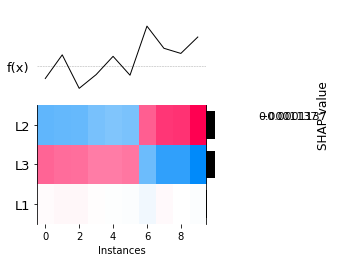

(10, 15, 3)
[[-2.47217680e-04  1.46746869e-03 -1.22025101e-03]
 [-2.17678029e-04  1.90457811e-03 -1.68690008e-03]
 [ 4.82255121e-05 -7.83424255e-04  7.35198743e-04]
 [ 2.65684006e-04 -8.20825409e-04  5.55141403e-04]
 [ 3.60208753e-05 -4.09942404e-04  3.73921528e-04]
 [ 3.00029093e-05 -2.87199950e-04  2.57197041e-04]
 [ 3.05742745e-05 -1.91236652e-04  1.60662377e-04]
 [ 2.68081515e-05 -2.22926336e-04  1.96118185e-04]
 [ 3.09514546e-05 -2.11572436e-04  1.80620982e-04]
 [ 2.67540804e-05 -4.46305873e-04  4.19551793e-04]]


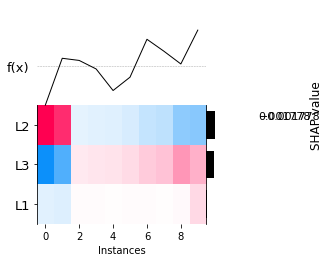

(10, 15, 3)
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


invalid value encountered in true_divide
invalid value encountered in true_divide


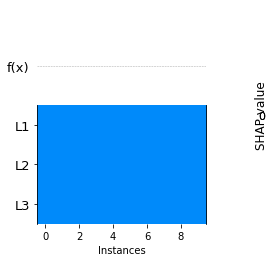

(10, 15, 3)
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


invalid value encountered in true_divide
invalid value encountered in true_divide


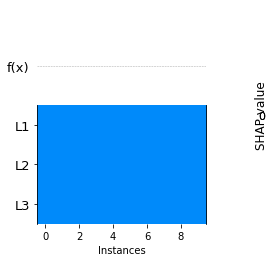

(10, 15, 3)
[[-4.28118694e-05  1.86491885e-03 -1.82210698e-03]
 [ 6.30266610e-04 -1.05478218e-04 -5.24788391e-04]
 [-2.36994746e-05 -2.45926532e-04  2.69626007e-04]
 [-1.20483850e-04 -1.77103824e-04  2.97587674e-04]
 [-1.38864945e-04 -1.94858117e-04  3.33723061e-04]
 [-5.64915485e-05 -2.88639563e-04  3.45131111e-04]
 [-9.13313650e-05 -1.75773347e-04  2.67104712e-04]
 [-8.04530165e-05 -3.22856324e-04  4.03309341e-04]
 [-8.81406068e-05 -2.75449389e-04  3.63589996e-04]
 [-1.01264184e-04 -1.63409827e-04  2.64674011e-04]]


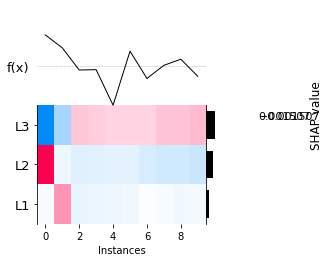

(10, 15, 3)
[[ 2.20486051e-05  2.13120130e-04 -2.35168735e-04]
 [ 3.03021132e-05  1.07157781e-04 -1.37459894e-04]
 [ 4.10886140e-05  1.38684320e-04 -1.79772934e-04]
 [-1.45438491e-05  2.28149865e-04 -2.13606016e-04]
 [ 3.93412129e-06  2.32377365e-04 -2.36311486e-04]
 [-1.09572988e-04  3.40228077e-05  7.55501805e-05]
 [ 1.17971117e-05 -3.39893987e-04  3.28096875e-04]
 [ 4.69872033e-06 -1.71087033e-04  1.66388312e-04]
 [ 5.84927979e-06 -2.68318546e-04  2.62469266e-04]
 [ 5.58084088e-06 -1.77933480e-04  1.72352639e-04]]


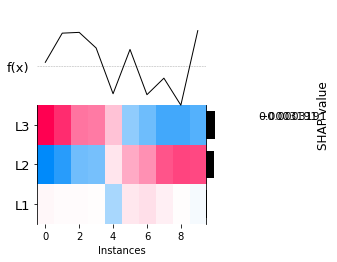

(10, 15, 3)
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


invalid value encountered in true_divide
invalid value encountered in true_divide


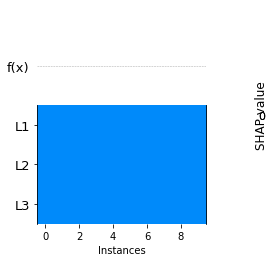

(10, 15, 3)
[[ 2.01046897e-06  7.40205525e-05 -7.60310215e-05]
 [-1.18084811e-05  1.39442684e-04 -1.27634203e-04]
 [-5.46869461e-06  1.47391559e-04 -1.41922865e-04]
 [-5.96798556e-06  1.32451141e-04 -1.26483155e-04]
 [ 1.74901118e-06  8.96197174e-05 -9.13687286e-05]
 [ 1.44135995e-06 -1.08397182e-04  1.06955822e-04]
 [ 2.55085973e-06 -1.06962714e-04  1.04411854e-04]
 [ 6.07968635e-06 -1.18074571e-04  1.11994885e-04]
 [ 6.20726540e-06 -1.17878412e-04  1.11671146e-04]
 [ 2.73343358e-06 -1.11143200e-04  1.08409767e-04]]


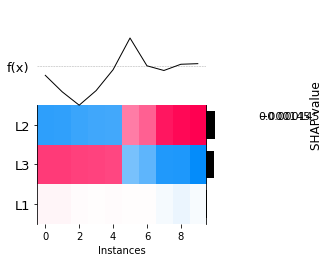

(10, 15, 3)
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


invalid value encountered in true_divide
invalid value encountered in true_divide


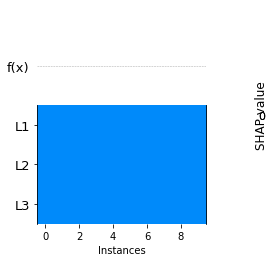

(10, 15, 3)
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


invalid value encountered in true_divide
invalid value encountered in true_divide


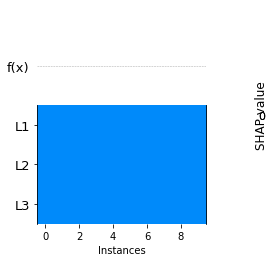

(10, 15, 3)
[[-6.43429453e-05  5.54625390e-04 -4.90282444e-04]
 [-7.93530288e-05  6.65399837e-04 -5.86046808e-04]
 [-8.31709067e-05  6.24654896e-04 -5.41483989e-04]
 [-7.66437552e-05  5.31057404e-04 -4.54413649e-04]
 [-2.81508663e-05  6.41497317e-04 -6.13346451e-04]
 [-2.85484754e-05  5.28003394e-04 -4.99454919e-04]
 [ 5.92658325e-05 -9.38766284e-04  8.79500452e-04]
 [ 6.09878912e-05 -8.77238179e-04  8.16250288e-04]
 [ 6.54128637e-05 -6.65411433e-04  5.99998570e-04]
 [ 1.25894368e-04 -9.96008527e-04  8.70114159e-04]]


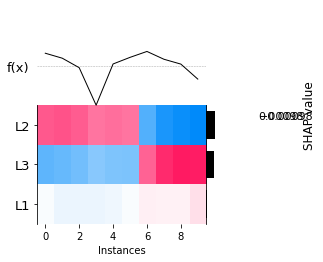

(10, 15, 3)
[[ 1.71800358e-05 -8.92741680e-06 -8.25261896e-06]
 [ 1.58291006e-05 -9.13198504e-06 -6.69711556e-06]
 [ 1.33637189e-05 -7.31177682e-06 -6.05194207e-06]
 [ 9.98111286e-06 -6.29694364e-07 -9.35141850e-06]
 [ 6.71715265e-06 -2.59090479e-06 -4.12624786e-06]
 [ 8.31621625e-06 -7.63226368e-06 -6.83952568e-07]
 [ 1.07126208e-05 -2.18207334e-06 -8.53054746e-06]
 [ 8.91814072e-06 -7.07899569e-06 -1.83914503e-06]
 [ 9.23710161e-06 -3.20481345e-06 -6.03228816e-06]
 [-9.20492831e-05  4.44475533e-05  4.76017298e-05]]


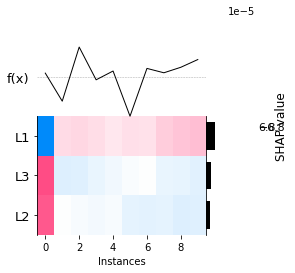

(10, 15, 3)
[[-9.57720049e-05  2.96208798e-04 -2.00436793e-04]
 [ 1.64121710e-05 -5.18676222e-05  3.54554512e-05]
 [ 1.25508797e-05 -3.79378299e-05  2.53869502e-05]
 [ 1.38378841e-07 -1.63125396e-05  1.61741607e-05]
 [ 1.33172763e-07 -1.69127303e-05  1.67795575e-05]
 [ 1.61243254e-07 -1.48204645e-05  1.46592212e-05]
 [ 4.49482084e-07 -2.34499069e-05  2.30004248e-05]
 [ 3.44381475e-06 -2.29178686e-05  1.94740539e-05]
 [ 2.49297900e-06 -2.70530993e-05  2.45601203e-05]
 [ 4.54370797e-06 -2.65625470e-05  2.20188390e-05]]


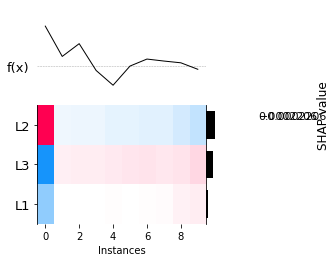

(10, 15, 3)
[[ 2.07041302e-05  1.05074469e-04 -1.25778599e-04]
 [ 3.49252480e-05  1.44552681e-04 -1.79477929e-04]
 [ 1.23299121e-05  1.27503304e-04 -1.39833216e-04]
 [ 3.20203817e-06  1.13023235e-04 -1.16225273e-04]
 [-1.39988098e-05  2.28529751e-04 -2.14530942e-04]
 [-3.00023501e-05  2.09474712e-04 -1.79472362e-04]
 [ 8.51489980e-05 -7.16154737e-05 -1.35335243e-05]
 [-5.61760357e-05 -1.40766105e-04  1.96942141e-04]
 [-6.50696463e-05 -2.89019263e-04  3.54088909e-04]
 [-2.11061332e-06 -4.36258965e-04  4.38369579e-04]]


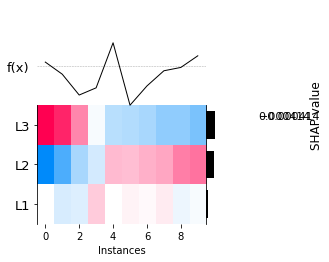

(10, 15, 3)
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


invalid value encountered in true_divide
invalid value encountered in true_divide


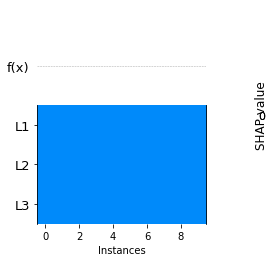

(10, 15, 3)
[[ 5.97669147e-05  1.23738802e-05 -7.21407950e-05]
 [ 5.23946201e-05 -9.02155526e-06 -4.33730648e-05]
 [ 8.05462538e-05 -5.54287942e-05 -2.51174596e-05]
 [ 6.13887174e-05  2.80741406e-05 -8.94628580e-05]
 [ 6.58784494e-05 -9.76805716e-06 -5.61103922e-05]
 [ 1.21820614e-04  3.39515446e-05 -1.55772159e-04]
 [ 8.62614823e-05 -5.33785848e-05 -3.28828975e-05]
 [ 9.45026264e-05 -2.97853872e-06 -9.15240877e-05]
 [ 5.33137205e-05 -3.74007959e-05 -1.59129246e-05]
 [-6.79428158e-04  2.11145231e-05  6.58313635e-04]]


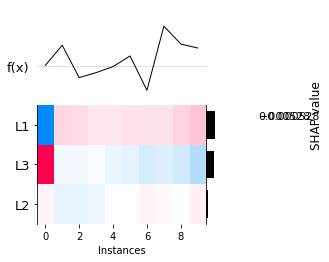

(10, 15, 3)
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


invalid value encountered in true_divide
invalid value encountered in true_divide


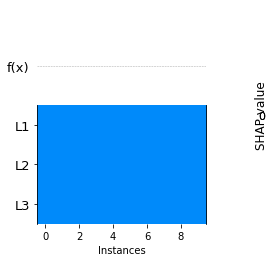

(10, 15, 3)
[[-2.16021597e-06  5.86679541e-05 -5.65077381e-05]
 [-3.69088915e-06  5.78010827e-05 -5.41101935e-05]
 [ 2.68693541e-06  2.74384042e-05 -3.01253396e-05]
 [-5.50596625e-07  8.00563017e-05 -7.95057051e-05]
 [-1.61212818e-06  5.87453952e-05 -5.71332670e-05]
 [-1.09626436e-06  8.01815317e-05 -7.90852674e-05]
 [-4.36884519e-06  7.00061676e-05 -6.56373225e-05]
 [-4.27884852e-06  5.54204145e-05 -5.11415660e-05]
 [ 7.64808374e-06 -2.26030269e-04  2.18382185e-04]
 [ 7.90610972e-06 -2.87193205e-04  2.79287095e-04]]


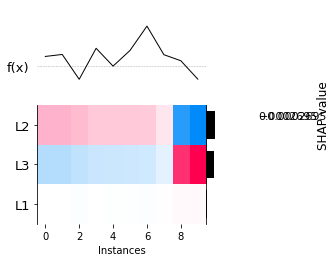

(10, 15, 3)
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


invalid value encountered in true_divide
invalid value encountered in true_divide


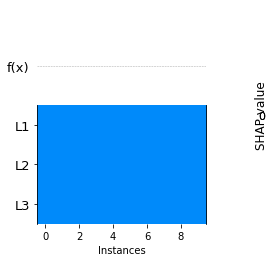

(10, 15, 3)
[[-5.98953771e-05  7.48754694e-04 -6.88859317e-04]
 [-5.30747681e-05  6.82304666e-04 -6.29229898e-04]
 [-6.11672627e-05  7.05246818e-04 -6.44079555e-04]
 [-6.12004045e-05  6.57435436e-04 -5.96235032e-04]
 [ 1.55099037e-05 -4.19203027e-04  4.03693123e-04]
 [ 5.37529896e-05 -3.55063825e-04  3.01310836e-04]
 [ 1.24442905e-05 -4.08487196e-04  3.96042906e-04]
 [ 4.06861111e-05 -5.77091172e-04  5.36405061e-04]
 [ 3.79389695e-05 -4.55497685e-04  4.17558715e-04]
 [ 6.31241243e-05 -4.70759664e-04  4.07635539e-04]]


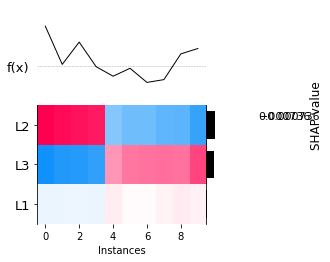

(10, 15, 3)
[[ 2.69328476e-06  1.32542147e-04 -1.35235431e-04]
 [ 2.05380201e-05  4.75814166e-05 -6.81194367e-05]
 [-2.62252598e-06  1.21000807e-04 -1.18378281e-04]
 [ 2.30097169e-05  3.69528238e-05 -5.99625406e-05]
 [ 2.27052678e-05  6.57538682e-05 -8.84591361e-05]
 [ 9.73100091e-06  7.58836503e-05 -8.56146512e-05]
 [ 1.96142501e-05  9.84853182e-05 -1.18099568e-04]
 [ 2.96723963e-05  7.33064746e-05 -1.02978871e-04]
 [-1.10665813e-04  4.71969987e-06  1.05946113e-04]
 [-1.16715050e-05 -6.28494330e-04  6.40165835e-04]]


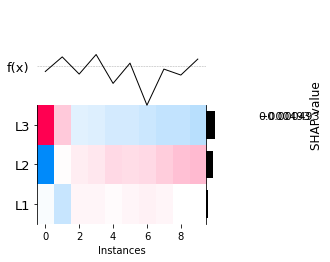

(10, 15, 3)
[[-9.94135208e-07  1.43571273e-04 -1.42577138e-04]
 [-2.83527191e-05  1.51792548e-04 -1.23439829e-04]
 [ 5.79985422e-06  1.65887876e-04 -1.71687730e-04]
 [ 3.79209865e-06  1.25291510e-04 -1.29083609e-04]
 [-1.66149636e-05  1.21862212e-04 -1.05247249e-04]
 [-1.94991067e-05  1.43592703e-04 -1.24093596e-04]
 [ 3.33047836e-05 -6.28403781e-06 -2.70207458e-05]
 [ 2.16214655e-05  5.30910602e-07 -2.21523761e-05]
 [-8.72995973e-05 -3.76489542e-04  4.63789140e-04]
 [ 4.88001065e-05 -4.43788503e-04  3.94988397e-04]]


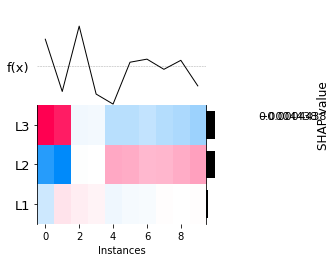

(10, 15, 3)
[[ 8.76359701e-05  4.29816757e-04 -5.17452728e-04]
 [ 1.60966233e-04  9.47257765e-05 -2.55692010e-04]
 [ 5.82810204e-05  4.81159113e-04 -5.39440134e-04]
 [ 1.08201229e-04  1.53428620e-04 -2.61629849e-04]
 [ 9.50167454e-05  1.58958740e-04 -2.53975485e-04]
 [ 1.02791705e-04  3.59162213e-04 -4.61953919e-04]
 [-4.16355095e-04  2.32043984e-04  1.84311111e-04]
 [-3.81513692e-05 -6.19516206e-04  6.57667575e-04]
 [-3.92889481e-05 -5.81733547e-04  6.21022495e-04]
 [-5.02522476e-05 -6.31492671e-04  6.81744919e-04]]


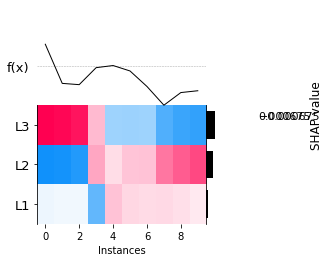

(10, 15, 3)
[[ 1.93608333e-04 -7.78083358e-05 -1.15799997e-04]
 [ 1.66792007e-04 -6.86129860e-05 -9.81790206e-05]
 [ 1.23165855e-04 -2.22989556e-05 -1.00866899e-04]
 [ 1.81408637e-04 -1.38177092e-05 -1.67590928e-04]
 [ 1.41137275e-04 -6.39749847e-05 -7.71622904e-05]
 [ 1.75358503e-04 -7.46487063e-05 -1.00709797e-04]
 [ 6.74242664e-04 -6.71248077e-04 -2.99458736e-06]
 [ 4.53790219e-04 -4.75052687e-04  2.12624681e-05]
 [-1.47695977e-03  1.12964086e-03  3.47318908e-04]
 [-6.05695162e-04  2.82169628e-04  3.23525535e-04]]


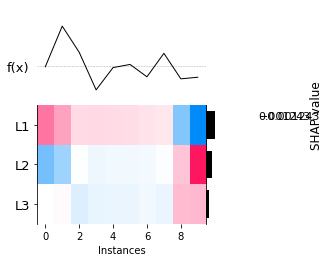

(10, 15, 3)
[[ 1.68595030e-03 -4.36198550e-04 -1.24975175e-03]
 [-3.18662877e-04  3.90619894e-04 -7.19570169e-05]
 [-2.88910467e-04  1.22113293e-04  1.66797174e-04]
 [-1.47956433e-04  6.56484172e-05  8.23080158e-05]
 [-2.15888071e-04  7.77741421e-05  1.38113929e-04]
 [-1.88412692e-04 -1.36359934e-04  3.24772626e-04]
 [-1.96302798e-04 -1.38684085e-05  2.10171207e-04]
 [-1.79110360e-04  7.56277249e-05  1.03482635e-04]
 [-1.25371450e-04 -9.04079038e-05  2.15779354e-04]
 [-1.53568640e-04  5.82193482e-05  9.53492920e-05]]


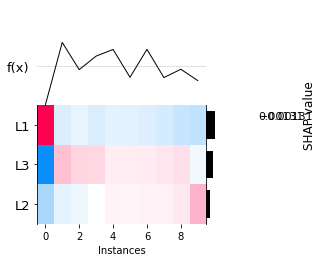

(10, 15, 3)
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


invalid value encountered in true_divide
invalid value encountered in true_divide


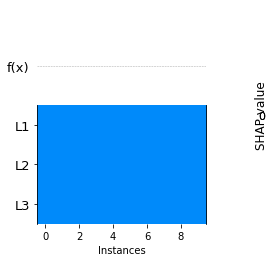

(10, 15, 3)
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


invalid value encountered in true_divide
invalid value encountered in true_divide


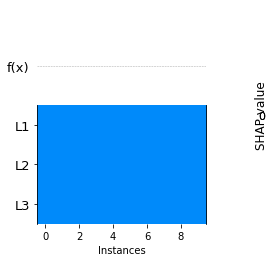

(10, 15, 3)
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


invalid value encountered in true_divide
invalid value encountered in true_divide


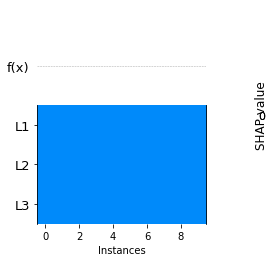

(10, 15, 3)
[[ 3.09088157e-05  1.87843199e-04 -2.18752015e-04]
 [-1.61095620e-05  4.54613347e-04 -4.38503785e-04]
 [ 1.46979013e-05  2.35983156e-04 -2.50681057e-04]
 [-2.47570445e-07  3.98422036e-04 -3.98174466e-04]
 [-1.18205805e-04 -1.45484729e-05  1.32754277e-04]
 [ 8.39404706e-07 -1.93280746e-04  1.92441342e-04]
 [ 3.43192805e-05 -2.79831318e-04  2.45512037e-04]
 [ 1.07810353e-06 -2.18495052e-04  2.17416949e-04]
 [ 3.11110575e-05 -3.50421493e-04  3.19310436e-04]
 [ 4.85345836e-07 -2.35803013e-04  2.35317668e-04]]


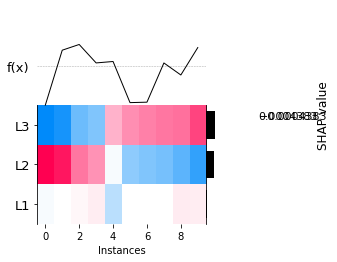

(10, 15, 3)
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


invalid value encountered in true_divide
invalid value encountered in true_divide


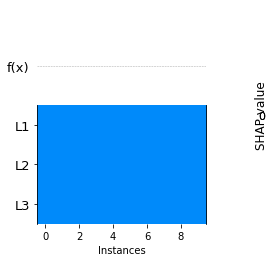

(10, 15, 3)
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


invalid value encountered in true_divide
invalid value encountered in true_divide


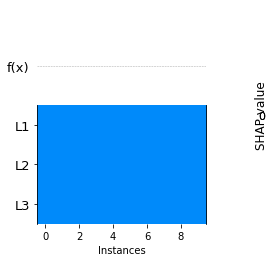

(10, 15, 3)
[[-6.50671045e-05  1.01839988e-03 -9.53332774e-04]
 [ 3.31091411e-06  9.47795491e-04 -9.51106406e-04]
 [ 2.50947172e-05 -1.74740519e-04  1.49645802e-04]
 [ 1.70575346e-05 -1.70986948e-04  1.53929413e-04]
 [ 1.43201005e-05 -1.66670714e-04  1.52350613e-04]
 [ 1.45530874e-05 -1.57733630e-04  1.43180543e-04]
 [ 1.10573779e-05 -1.62856656e-04  1.51799278e-04]
 [ 1.19399471e-05 -1.50956017e-04  1.39016069e-04]
 [-5.89864696e-05 -7.42284114e-05  1.33214881e-04]
 [-6.85947781e-07 -8.40643692e-04  8.41329640e-04]]


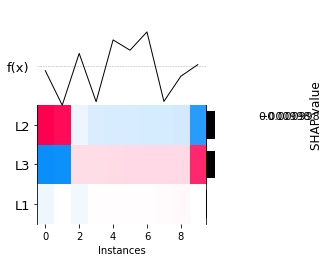

(10, 15, 3)
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


invalid value encountered in true_divide
invalid value encountered in true_divide


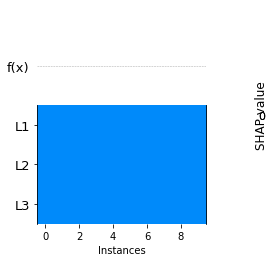

(10, 15, 3)
[[-3.03954732e-05  1.93541706e-04 -1.63146233e-04]
 [-3.15679283e-05  1.90280419e-04 -1.58712491e-04]
 [ 3.52592314e-06 -3.94746101e-05  3.59486870e-05]
 [ 7.34956223e-06 -4.47497377e-05  3.74001755e-05]
 [ 1.95271893e-06 -4.32123570e-05  4.12596381e-05]
 [ 5.44287134e-06 -5.01047979e-05  4.46619266e-05]
 [ 1.31302406e-05 -6.26384871e-05  4.95082465e-05]
 [ 1.27392708e-05 -6.26589135e-05  4.99196426e-05]
 [ 8.97977930e-06 -4.01511053e-05  3.11713260e-05]
 [ 9.41730205e-06 -3.76272169e-05  2.82099149e-05]]


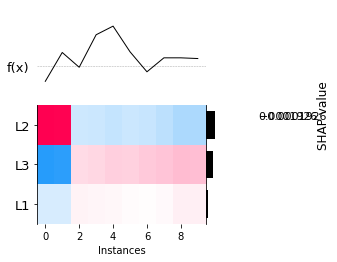

(10, 15, 3)
[[-1.09783898e-04  7.95089523e-04 -6.85305624e-04]
 [-5.98537084e-05  1.00572175e-03 -9.45868044e-04]
 [-2.28442837e-05  6.56181233e-04 -6.33336950e-04]
 [-3.07183125e-05  6.99701578e-04 -6.68983266e-04]
 [ 1.62853812e-05 -5.15325159e-04  4.99039778e-04]
 [ 1.05095989e-04 -4.18544562e-04  3.13448572e-04]
 [ 1.17372865e-05 -4.50426262e-04  4.38688975e-04]
 [ 6.96315310e-05 -6.48034359e-04  5.78402828e-04]
 [-2.15316112e-06 -5.21441979e-04  5.23595140e-04]
 [ 1.23778195e-05 -4.22538208e-04  4.10160389e-04]]


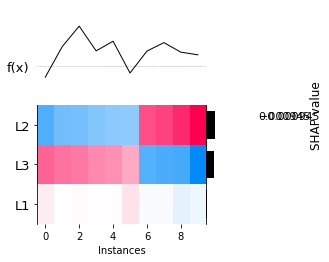

(10, 15, 3)
[[-2.83175082e-05  2.62286001e-04 -2.33968492e-04]
 [-5.13515204e-06  2.34206444e-04 -2.29071292e-04]
 [-1.65042476e-05  2.72297983e-04 -2.55793735e-04]
 [-2.25299571e-05  1.96311578e-04 -1.73781621e-04]
 [ 2.65888696e-06  1.99438902e-04 -2.02097789e-04]
 [-2.24627567e-05  9.52708159e-05 -7.28080592e-05]
 [ 1.37083819e-05  1.57137613e-04 -1.70845995e-04]
 [ 2.34296833e-05 -4.32153562e-04  4.08723879e-04]
 [ 2.20641936e-05 -5.31129615e-04  5.09065422e-04]
 [ 3.48429465e-05 -5.07598317e-04  4.72755371e-04]]


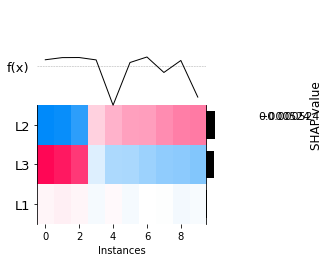

(10, 15, 3)
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


invalid value encountered in true_divide
invalid value encountered in true_divide


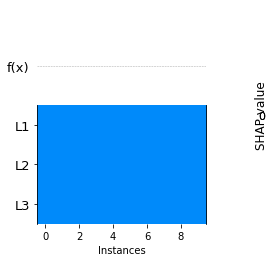

(10, 15, 3)
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


invalid value encountered in true_divide
invalid value encountered in true_divide


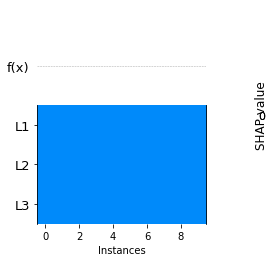

(10, 15, 3)
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


invalid value encountered in true_divide
invalid value encountered in true_divide


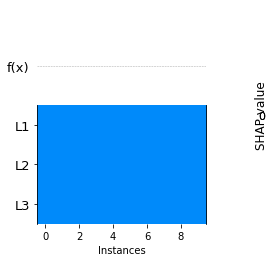

(10, 15, 3)
[[-2.93003489e-05  1.17366414e-04 -8.80660648e-05]
 [-2.39448263e-05  1.02403197e-04 -7.84583702e-05]
 [-4.78797730e-05  1.76560515e-04 -1.28680742e-04]
 [-2.74129809e-05  1.70463135e-04 -1.43050154e-04]
 [-1.68931836e-05  1.45575027e-04 -1.28681844e-04]
 [-1.35726658e-05  1.76242034e-04 -1.62669368e-04]
 [-7.70911120e-05  1.52852790e-04 -7.57616780e-05]
 [-1.97654966e-05  1.52183417e-04 -1.32417920e-04]
 [ 1.74021710e-04 -6.02804297e-04  4.28782588e-04]
 [ 7.53226391e-05 -6.26680255e-04  5.51357616e-04]]


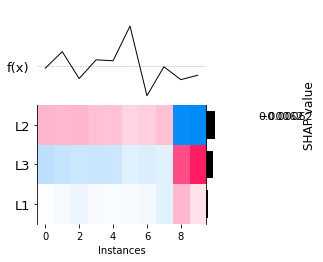

(10, 15, 3)
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


invalid value encountered in true_divide
invalid value encountered in true_divide


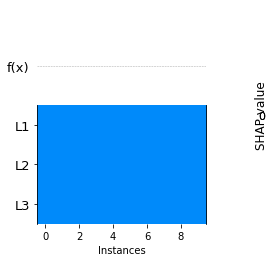

(10, 15, 3)
[[-1.49872452e-05  1.01479279e-04 -8.64920337e-05]
 [-2.94829211e-06  1.05158797e-04 -1.02210504e-04]
 [-2.29795518e-05  1.37722884e-04 -1.14743332e-04]
 [-1.72766893e-05  1.02052509e-04 -8.47758193e-05]
 [-9.01689861e-06  1.31301290e-04 -1.22284391e-04]
 [ 6.96331740e-06 -7.93636748e-05  7.24003574e-05]
 [ 9.62978703e-06 -1.30013886e-04  1.20384099e-04]
 [ 1.97339134e-05 -1.03973880e-04  8.42399662e-05]
 [ 7.95738514e-06 -1.08202299e-04  1.00244914e-04]
 [ 2.21016855e-05 -1.40422925e-04  1.18321240e-04]]


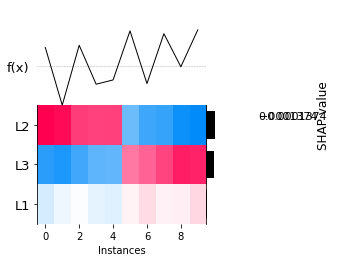

(10, 15, 3)
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


invalid value encountered in true_divide
invalid value encountered in true_divide


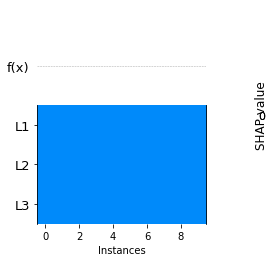

(10, 15, 3)
[[-2.92284388e-05  5.62272032e-04 -5.33043594e-04]
 [ 2.41727329e-04 -4.75860396e-05 -1.94141290e-04]
 [-2.05839936e-05 -4.83675833e-05  6.89515768e-05]
 [-5.58236762e-06 -5.53337907e-05  6.09161583e-05]
 [-1.96424022e-05 -8.39111090e-05  1.03553511e-04]
 [-2.82519343e-05 -7.89285564e-05  1.07180491e-04]
 [-4.75762763e-05 -1.10293048e-04  1.57869324e-04]
 [-2.36683416e-05 -2.83847081e-05  5.20530497e-05]
 [-1.07569441e-05 -5.04500658e-05  6.12070099e-05]
 [-3.03440415e-05 -7.33928429e-05  1.03736884e-04]]


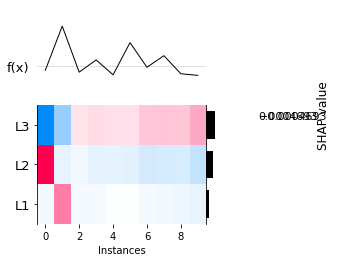

(10, 15, 3)
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


invalid value encountered in true_divide
invalid value encountered in true_divide


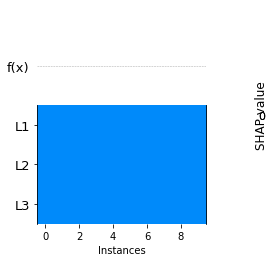

(10, 15, 3)
[[-2.15855939e-06  1.69731088e-04 -1.67572528e-04]
 [-3.29289348e-06  1.88854523e-04 -1.85561629e-04]
 [-1.47811470e-05  2.07672170e-04 -1.92891023e-04]
 [-7.63777849e-06  1.86377981e-04 -1.78740203e-04]
 [-1.72511628e-05  1.71203397e-04 -1.53952234e-04]
 [-8.89001039e-06  1.91877055e-04 -1.82987045e-04]
 [ 2.30914028e-05 -3.15610400e-04  2.92518997e-04]
 [ 7.39657542e-06 -2.30874731e-04  2.23478156e-04]
 [ 9.75411940e-06 -2.84487888e-04  2.74733768e-04]
 [ 1.04676919e-05 -2.91317102e-04  2.80849410e-04]]


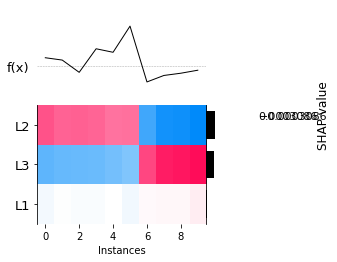

(10, 15, 3)
[[ 9.75231445e-06  5.60619916e-04 -5.70372230e-04]
 [-1.69212591e-05  6.56852717e-04 -6.39931458e-04]
 [ 2.17981364e-04 -1.03535011e-04 -1.14446353e-04]
 [ 1.71026650e-04 -1.07570848e-04 -6.34558020e-05]
 [-1.63302685e-05  1.34190240e-05  2.91124449e-06]
 [-1.21321662e-04 -1.56389866e-04  2.77711527e-04]
 [-6.22259995e-05 -2.56895028e-04  3.19121028e-04]
 [-2.22328356e-05 -1.65767220e-04  1.88000056e-04]
 [-3.00499224e-06 -2.32980779e-04  2.35985771e-04]
 [-8.34088521e-05 -1.52096124e-04  2.35504977e-04]]


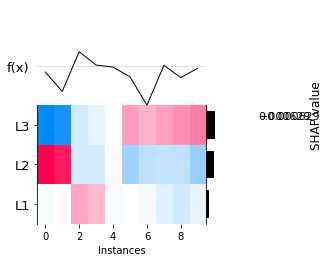

(10, 15, 3)
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


invalid value encountered in true_divide
invalid value encountered in true_divide


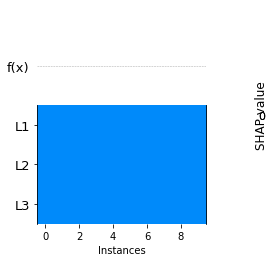

(10, 15, 3)
[[ 1.25470625e-07  6.96141788e-06 -7.08688851e-06]
 [-1.13871432e-06  1.00109483e-05 -8.87223393e-06]
 [ 9.57370191e-08 -1.93077074e-06  1.83503372e-06]
 [-6.07226664e-08 -1.92113550e-06  1.98185816e-06]
 [ 8.23070280e-08 -1.97044051e-06  1.88813348e-06]
 [ 1.10971287e-07 -2.20542780e-06  2.09445652e-06]
 [ 2.10444787e-07 -2.37394172e-06  2.16349693e-06]
 [-2.37108520e-08 -1.73843460e-06  1.76214545e-06]
 [ 1.22215000e-07 -2.28458996e-06  2.16237496e-06]
 [ 3.41341786e-07 -2.04023534e-06  1.69889356e-06]]


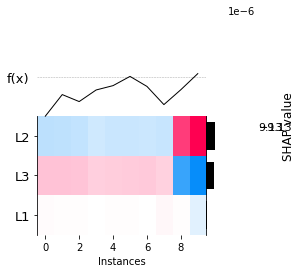

(10, 15, 3)
[[ 1.08074011e-06  1.25508710e-04 -1.26589450e-04]
 [-1.02054213e-05  7.01021417e-05 -5.98967204e-05]
 [-2.06215454e-05  1.25815177e-04 -1.05193632e-04]
 [ 9.41220834e-07  1.12940024e-04 -1.13881245e-04]
 [-1.26100645e-06  1.19253516e-04 -1.17992510e-04]
 [ 1.85901831e-06  1.29424476e-04 -1.31283494e-04]
 [-7.13544022e-06  1.01596126e-04 -9.44606857e-05]
 [ 1.89550143e-05 -3.47658089e-04  3.28703075e-04]
 [ 9.36919677e-06 -1.97657024e-04  1.88287827e-04]
 [ 8.13402130e-06 -2.05285543e-04  1.97151522e-04]]


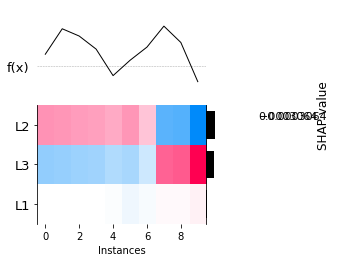

(10, 15, 3)
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


invalid value encountered in true_divide
invalid value encountered in true_divide


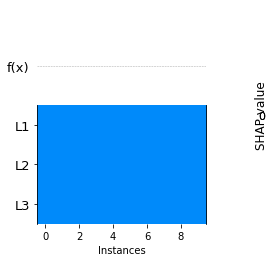

(10, 15, 3)
[[-1.81142946e-05  3.37403453e-04 -3.19289159e-04]
 [-1.47110801e-05  3.74717369e-04 -3.60006289e-04]
 [ 2.16299075e-06  2.22993881e-04 -2.25156872e-04]
 [-1.65488836e-05  3.76867765e-04 -3.60318882e-04]
 [ 1.61876956e-07 -1.68003398e-04  1.67841521e-04]
 [ 1.24197016e-06 -1.85378796e-04  1.84136826e-04]
 [ 1.17531840e-05 -2.52602978e-04  2.40849794e-04]
 [-2.14506073e-06 -1.71099566e-04  1.73244627e-04]
 [ 1.20595357e-05 -2.72630842e-04  2.60571306e-04]
 [ 2.71626170e-05 -2.80191473e-04  2.53028856e-04]]


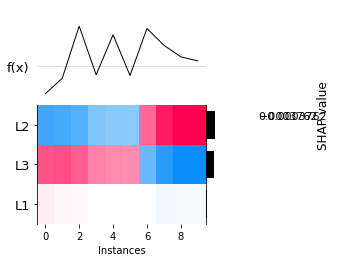

(10, 15, 3)
[[ 3.62050097e-07  6.09621218e-05 -6.13241719e-05]
 [-1.26538991e-05  1.14705429e-04 -1.02051530e-04]
 [ 7.12052320e-07 -1.28767424e-05  1.21646901e-05]
 [ 1.19233251e-06 -2.18601122e-05  2.06677797e-05]
 [ 1.88191436e-07 -1.31374074e-05  1.29492160e-05]
 [ 5.52403472e-06 -2.73142735e-05  2.17902388e-05]
 [ 1.15227640e-06 -1.86088841e-05  1.74566077e-05]
 [ 2.68491389e-06 -3.10367556e-05  2.83518417e-05]
 [ 8.10578634e-07 -2.87957624e-05  2.79851837e-05]
 [ 5.49699236e-07 -2.09914529e-05  2.04417537e-05]]


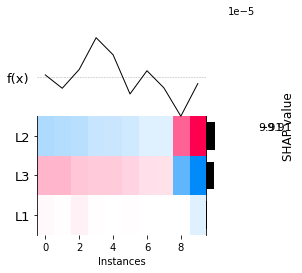

(10, 15, 3)
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


invalid value encountered in true_divide
invalid value encountered in true_divide


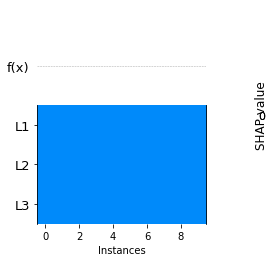

(10, 15, 3)
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


invalid value encountered in true_divide
invalid value encountered in true_divide


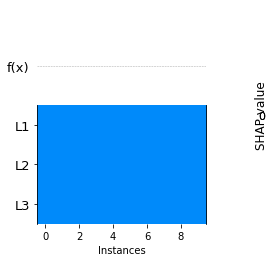

(10, 15, 3)
[[-2.32681861e-05  3.43718249e-04 -3.20450063e-04]
 [-1.96471759e-05  3.14790215e-04 -2.95143039e-04]
 [-9.58415620e-06  3.20599124e-04 -3.11014968e-04]
 [-2.54936367e-05  3.34420631e-04 -3.08926994e-04]
 [-7.86254583e-05  4.97719130e-04 -4.19093672e-04]
 [ 4.28244967e-05 -4.14070013e-04  3.71245516e-04]
 [-2.85587839e-06 -2.67204043e-04  2.70059921e-04]
 [-4.92538490e-06 -2.60674557e-04  2.65599942e-04]
 [ 6.22915339e-05 -4.56005693e-04  3.93714159e-04]
 [ 4.77430781e-05 -4.76389695e-04  4.28646617e-04]]


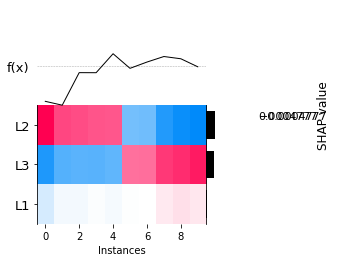

(10, 15, 3)
[[-2.86420528e-06  1.52722105e-04 -1.49857899e-04]
 [-2.18762468e-05  2.43353188e-04 -2.21476942e-04]
 [-3.11719331e-05  2.40676432e-04 -2.09504499e-04]
 [-2.99235527e-05  2.12183132e-04 -1.82259579e-04]
 [-2.91345461e-05  2.02135767e-04 -1.73001221e-04]
 [-1.56916945e-05  2.48622319e-04 -2.32930625e-04]
 [-2.96219784e-05  2.00162951e-04 -1.70540973e-04]
 [-1.25880409e-05  2.40576319e-04 -2.27988278e-04]
 [ 5.33897539e-05 -8.24589937e-04  7.71200184e-04]
 [ 1.02462267e-04 -8.67393117e-04  7.64930850e-04]]


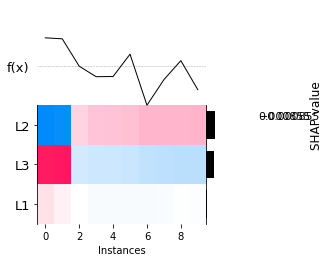

(10, 15, 3)
[[-2.93592178e-05  4.22297426e-04 -3.92938208e-04]
 [-4.11102984e-07  2.81411911e-04 -2.81000808e-04]
 [ 7.02536492e-08 -6.65829246e-05  6.65126710e-05]
 [ 4.30152507e-06 -1.05586907e-04  1.01285382e-04]
 [-5.96654083e-07 -6.92792626e-05  6.98759167e-05]
 [ 9.51803431e-06 -1.26739632e-04  1.17221598e-04]
 [ 4.23435642e-06 -1.20623813e-04  1.16389456e-04]
 [-1.06845653e-06 -5.99881228e-05  6.10565793e-05]
 [ 2.55512775e-06 -6.54491754e-05  6.28940476e-05]
 [ 1.39666933e-05 -1.02100429e-04  8.81337359e-05]]


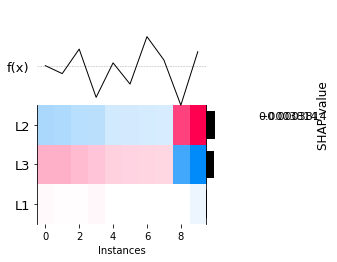

(10, 15, 3)
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


invalid value encountered in true_divide
invalid value encountered in true_divide


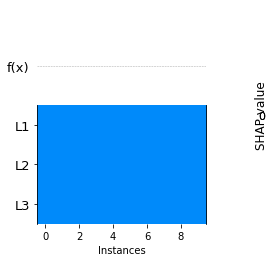

(10, 15, 3)
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


invalid value encountered in true_divide
invalid value encountered in true_divide


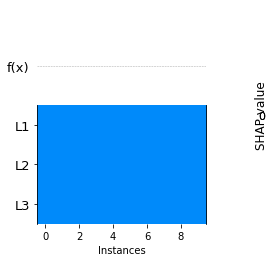

(10, 15, 3)
[[-3.24069704e-05  1.15660265e-03 -1.12419568e-03]
 [ 2.85245294e-05  6.14993114e-04 -6.43517644e-04]
 [ 2.88013693e-05  4.00141350e-04 -4.28942719e-04]
 [ 1.51401433e-05  8.68180519e-04 -8.83320663e-04]
 [ 2.22083190e-05  7.98475481e-04 -8.20683800e-04]
 [-2.24274342e-05  1.19209206e-03 -1.16966463e-03]
 [ 5.70336587e-06 -1.48099972e-03  1.47529635e-03]
 [-4.25886991e-06 -1.12564774e-03  1.12990661e-03]
 [-2.94126176e-05 -1.13550363e-03  1.16491625e-03]
 [-1.21714509e-05 -1.21119570e-03  1.22336715e-03]]


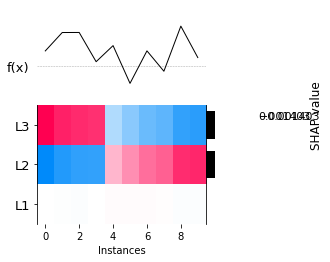

(10, 15, 3)
[[ 2.02971260e-05  2.92358290e-04 -3.12655416e-04]
 [ 2.45749492e-06  2.69577175e-04 -2.72034669e-04]
 [-1.88139262e-07  2.91164309e-04 -2.90976170e-04]
 [-3.64759176e-05  3.05650488e-04 -2.69174570e-04]
 [-9.83427641e-06 -3.00815038e-04  3.10649315e-04]
 [ 3.92108981e-06 -2.32542187e-04  2.28621097e-04]
 [-1.92757491e-06 -1.64454576e-04  1.66382151e-04]
 [-4.58900751e-07 -1.59296576e-04  1.59755476e-04]
 [-6.06440204e-06 -1.68421616e-04  1.74486018e-04]
 [ 2.82035116e-05 -2.01214454e-04  1.73010943e-04]]


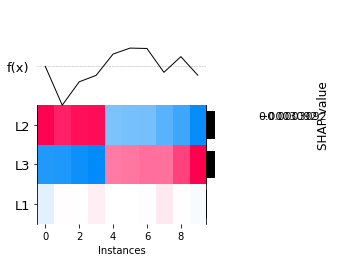

(10, 15, 3)
[[-1.31271521e-06  1.39545172e-05 -1.26418020e-05]
 [ 3.55369999e-07  4.40655104e-06 -4.76192104e-06]
 [ 8.44870721e-07  5.56930415e-06 -6.41417487e-06]
 [-1.59389300e-06  1.54170732e-05 -1.38231802e-05]
 [-1.26537859e-06  1.20318081e-05 -1.07664295e-05]
 [-1.49552783e-06  1.55030150e-05 -1.40074872e-05]
 [ 8.54094962e-07  5.39902397e-06 -6.25311893e-06]
 [-1.40233783e-06  1.60326712e-05 -1.46303334e-05]
 [-4.62832668e-07  1.79354249e-05 -1.74725922e-05]
 [ 5.14106931e-06 -1.21146049e-04  1.16004980e-04]]


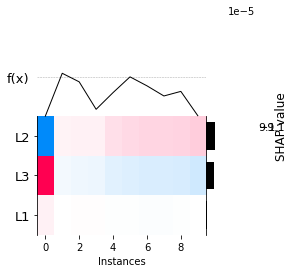

(10, 15, 3)
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


invalid value encountered in true_divide
invalid value encountered in true_divide


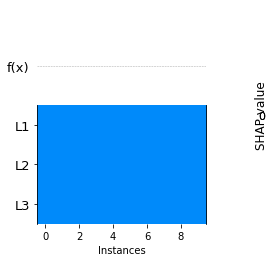

(10, 15, 3)
[[-3.83357987e-06  3.97355835e-04 -3.93522255e-04]
 [-1.17642657e-04  8.89597871e-04 -7.71955214e-04]
 [-1.08874100e-05 -3.04558768e-05  4.13432868e-05]
 [ 3.79081492e-05 -2.36124863e-04  1.98216713e-04]
 [ 1.07250193e-05 -1.79000938e-04  1.68275918e-04]
 [ 7.02847474e-06 -1.42871742e-04  1.35843267e-04]
 [ 1.03808746e-05 -1.58306043e-04  1.47925168e-04]
 [-3.16286247e-07 -1.14549125e-04  1.14865411e-04]
 [ 2.72237174e-05 -2.27640649e-04  2.00416931e-04]
 [ 1.37354995e-05 -1.80641475e-04  1.66905975e-04]]


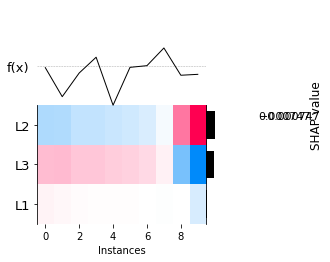

(10, 15, 3)
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


invalid value encountered in true_divide
invalid value encountered in true_divide


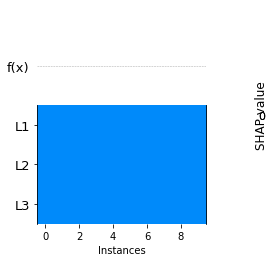

(10, 15, 3)
[[ 1.75165336e-05  2.62156907e-04 -2.79673441e-04]
 [ 6.70566673e-07  2.64309718e-04 -2.64980284e-04]
 [-4.88605016e-06  3.57196982e-04 -3.52310932e-04]
 [-3.75346827e-05  2.59367682e-04 -2.21833000e-04]
 [-9.95018210e-06  2.90469620e-04 -2.80519437e-04]
 [-1.50143621e-05  2.98887026e-04 -2.83872664e-04]
 [ 1.64779909e-05  2.77945733e-04 -2.94423724e-04]
 [-1.07865107e-04  5.91019566e-06  1.01954912e-04]
 [ 1.97120991e-06 -9.78240752e-04  9.76269543e-04]
 [ 9.50037603e-05 -1.02409179e-03  9.29088032e-04]]


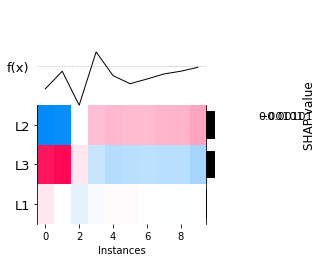

(10, 15, 3)
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


invalid value encountered in true_divide
invalid value encountered in true_divide


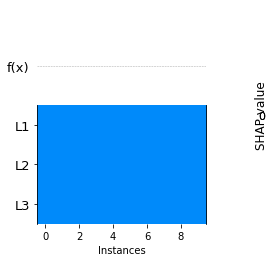

(10, 15, 3)
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


invalid value encountered in true_divide
invalid value encountered in true_divide


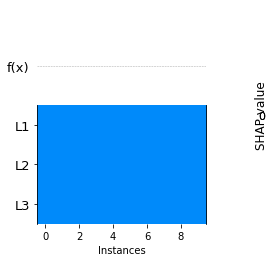

(10, 15, 3)
[[ 2.41051137e-06  5.22297183e-05 -5.46402296e-05]
 [-4.66615957e-06  9.81473003e-05 -9.34811407e-05]
 [ 2.74609490e-06  5.90059971e-05 -6.17520920e-05]
 [-7.58106136e-06  1.01445162e-04 -9.38641010e-05]
 [-5.00306764e-06  9.24911672e-05 -8.74880996e-05]
 [ 1.11747403e-05 -9.79549533e-05  8.67802130e-05]
 [ 1.13715422e-06 -7.07828361e-05  6.96456819e-05]
 [ 4.39246685e-07 -6.60570450e-05  6.56177983e-05]
 [-1.49022132e-06 -9.75344525e-05  9.90246738e-05]
 [ 5.91071527e-07 -6.15544031e-05  6.09633316e-05]]


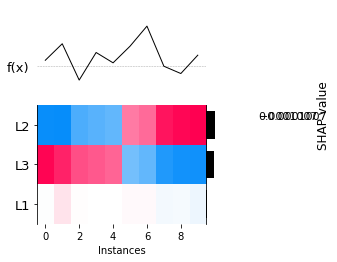

(10, 15, 3)
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


invalid value encountered in true_divide
invalid value encountered in true_divide


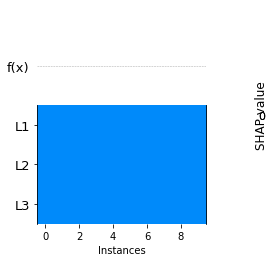

(10, 15, 3)
[[ 4.00927507e-06  1.99542606e-05 -2.39635357e-05]
 [ 4.31170040e-06  3.98310525e-06 -8.29480565e-06]
 [ 1.95603649e-07  1.69446899e-05 -1.71402936e-05]
 [ 7.49314716e-08  1.87032012e-05 -1.87781327e-05]
 [ 3.38660163e-06  6.26461053e-06 -9.65121216e-06]
 [ 4.08336805e-06  8.50707031e-06 -1.25904384e-05]
 [ 3.05297116e-06  1.93739470e-05 -2.24269182e-05]
 [ 4.44820633e-06  6.63924079e-06 -1.10874471e-05]
 [-1.43336789e-05 -2.74867769e-06  1.70823566e-05]
 [-5.76502684e-06 -1.05177785e-04  1.10942812e-04]]


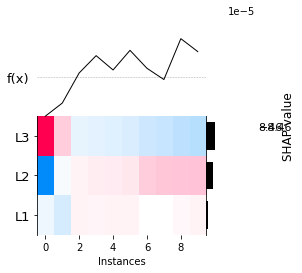

(10, 15, 3)
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


invalid value encountered in true_divide
invalid value encountered in true_divide


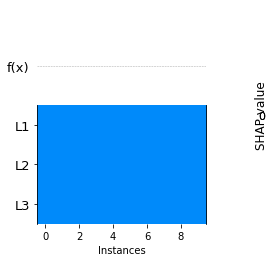

(10, 15, 3)
[[-2.47781528e-05  1.92053342e-04 -1.67275190e-04]
 [-2.75208301e-05  2.31536881e-04 -2.04016051e-04]
 [-2.66397493e-05  1.96977211e-04 -1.70337462e-04]
 [ 2.68045249e-07  1.56893298e-04 -1.57161343e-04]
 [-1.44714842e-05  2.51475419e-04 -2.37003935e-04]
 [-1.20849553e-05  2.41636003e-04 -2.29551048e-04]
 [ 1.88062969e-05 -3.06995050e-04  2.88188753e-04]
 [ 5.15480782e-05 -4.06723853e-04  3.55175775e-04]
 [ 1.81469995e-05 -2.61518784e-04  2.43371784e-04]
 [ 1.59029432e-05 -2.57759908e-04  2.41856965e-04]]


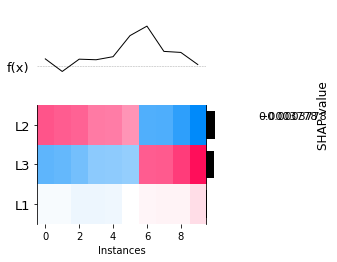

(10, 15, 3)
[[-3.42975867e-05  5.59446327e-04 -5.25148740e-04]
 [ 1.00525038e-05  3.94338307e-04 -4.04390811e-04]
 [-3.30841076e-05  5.44768278e-04 -5.11684170e-04]
 [-4.56083801e-05  5.17242089e-04 -4.71633709e-04]
 [ 8.20947288e-06 -3.53477699e-04  3.45268226e-04]
 [ 1.59331165e-05 -2.58054857e-04  2.42121741e-04]
 [ 1.76633471e-05 -3.22934592e-04  3.05271245e-04]
 [ 1.43243455e-05 -2.36947119e-04  2.22622774e-04]
 [ 1.51168648e-05 -2.87752692e-04  2.72635827e-04]
 [ 2.51848872e-05 -3.87640121e-04  3.62455234e-04]]


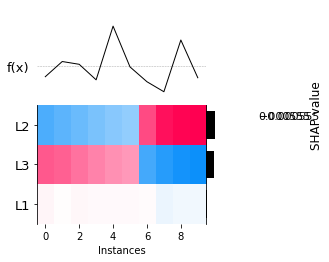

(10, 15, 3)
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


invalid value encountered in true_divide
invalid value encountered in true_divide


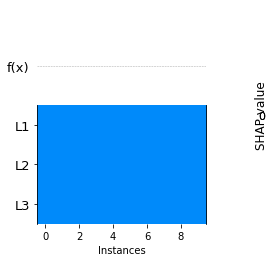

(10, 15, 3)
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


invalid value encountered in true_divide
invalid value encountered in true_divide


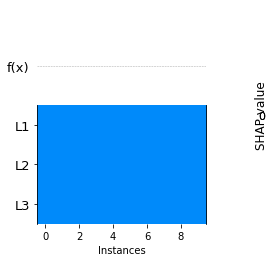

(10, 15, 3)
[[-4.28222456e-05  3.78515524e-04 -3.35693278e-04]
 [ 2.48382451e-06 -5.70423166e-05  5.45584921e-05]
 [ 4.00833387e-06 -3.16588067e-05  2.76504728e-05]
 [ 2.55843722e-06 -5.34249184e-05  5.08664812e-05]
 [ 3.32282292e-06 -3.42292756e-05  3.09064527e-05]
 [ 3.53040254e-06 -4.05619624e-05  3.70315599e-05]
 [ 1.24209237e-05 -4.20955999e-05  2.96746763e-05]
 [ 1.42897022e-06 -3.26930993e-05  3.12641290e-05]
 [ 2.92243587e-06 -3.36159900e-05  3.06935541e-05]
 [ 1.57567006e-06 -4.37414369e-05  4.21657668e-05]]


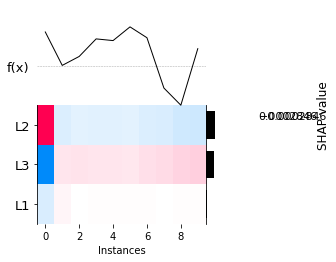

(10, 15, 3)
[[-1.14000549e-05  8.45091006e-05 -7.31090458e-05]
 [-1.58694032e-05  9.91941780e-05 -8.33247748e-05]
 [-1.83221230e-05  9.58153539e-05 -7.74932308e-05]
 [-6.31410730e-06  6.16437422e-05 -5.53296349e-05]
 [-1.07888047e-05  6.69271760e-05 -5.61383714e-05]
 [-1.33574440e-05  9.97659463e-05 -8.64085022e-05]
 [-1.23567071e-05  7.04594738e-05 -5.81027667e-05]
 [ 1.92659204e-05 -1.61651646e-04  1.42385725e-04]
 [ 3.17877536e-05 -2.04693303e-04  1.72905550e-04]
 [ 3.60401799e-05 -1.88077677e-04  1.52037497e-04]]


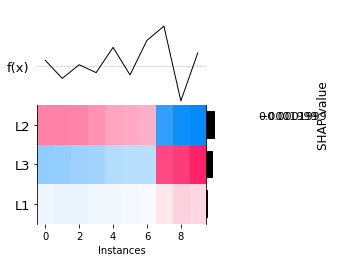

(10, 15, 3)
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


invalid value encountered in true_divide
invalid value encountered in true_divide


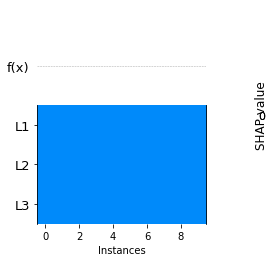

(10, 15, 3)
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


invalid value encountered in true_divide
invalid value encountered in true_divide


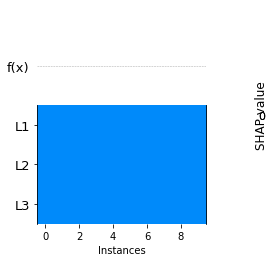

(10, 15, 3)
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


invalid value encountered in true_divide
invalid value encountered in true_divide


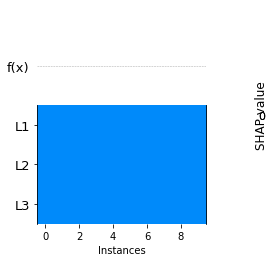

(10, 15, 3)
[[-5.16403692e-06  4.16993311e-05 -3.65352942e-05]
 [-3.04902527e-06  3.84400380e-05 -3.53910127e-05]
 [ 1.87130828e-06 -9.11704374e-06  7.24573546e-06]
 [ 1.37431629e-07 -9.92158111e-06  9.78414948e-06]
 [ 2.21578739e-07 -8.59861695e-06  8.37703821e-06]
 [ 7.65940405e-07 -8.77930137e-06  8.01336097e-06]
 [ 2.15949452e-06 -1.22951681e-05  1.01356736e-05]
 [ 3.59513909e-07 -9.61146135e-06  9.25194744e-06]
 [ 1.84318037e-06 -8.22644359e-06  6.38326322e-06]
 [ 3.49695231e-07 -7.92564018e-06  7.57594495e-06]]


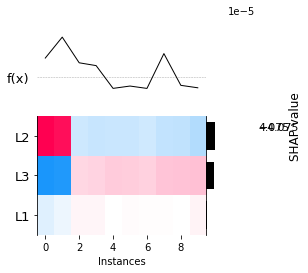

(10, 15, 3)
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


invalid value encountered in true_divide
invalid value encountered in true_divide


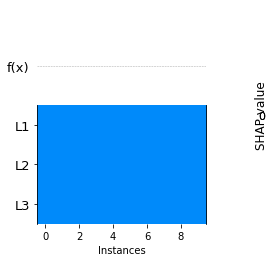

(10, 15, 3)
[[-1.18644729e-04  7.68749862e-04 -6.50105133e-04]
 [ 5.87349760e-06 -5.81557896e-05  5.22822920e-05]
 [ 7.06888572e-06 -8.34417133e-05  7.63728276e-05]
 [ 8.98314141e-06 -9.49756334e-05  8.59924920e-05]
 [ 6.41748946e-06 -7.76283933e-05  7.12109039e-05]
 [ 4.34557411e-07 -1.10468035e-04  1.10033477e-04]
 [ 1.78329836e-05 -5.20681634e-05  3.42351798e-05]
 [ 2.63424362e-05 -9.74266164e-05  7.10841802e-05]
 [ 1.36154937e-05 -8.69041438e-05  7.32886501e-05]
 [ 2.49740588e-05 -1.05131947e-04  8.01578881e-05]]


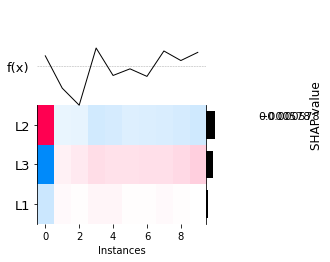

(10, 15, 3)
[[-5.50283293e-06  5.50309166e-05 -4.95280836e-05]
 [-4.56937466e-06  4.21859494e-05 -3.76165747e-05]
 [-2.18164124e-06  6.88774148e-05 -6.66957736e-05]
 [-1.98063764e-06  6.55667443e-05 -6.35861067e-05]
 [-4.93253383e-06  5.41505492e-05 -4.92180154e-05]
 [-5.40053962e-06  6.47882552e-05 -5.93877156e-05]
 [-4.50935481e-06  6.72339056e-05 -6.27245508e-05]
 [ 1.46731327e-06  4.03591642e-05 -4.18264775e-05]
 [ 1.45923293e-05 -2.54689581e-04  2.40097251e-04]
 [ 1.65426163e-05 -2.42491035e-04  2.25948419e-04]]


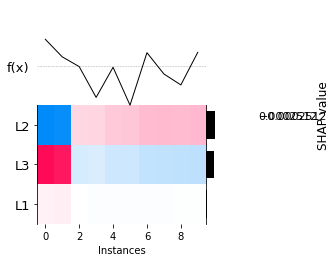

(10, 15, 3)
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


invalid value encountered in true_divide
invalid value encountered in true_divide


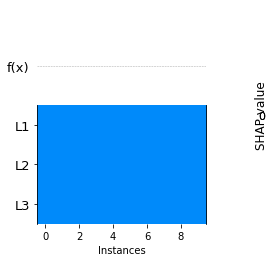

(10, 15, 3)
[[-1.57471352e-06  1.15471433e-05 -9.97242974e-06]
 [-4.73787211e-07  9.35910666e-06 -8.88531945e-06]
 [-1.73909483e-06  1.43143943e-05 -1.25752995e-05]
 [-1.51589172e-06  1.16787391e-05 -1.01628473e-05]
 [-1.68313634e-06  1.31565914e-05 -1.14734551e-05]
 [-1.78528825e-06  1.15516003e-05 -9.76631204e-06]
 [-1.72887773e-06  1.23505171e-05 -1.06216393e-05]
 [-1.69687009e-06  1.09871071e-05 -9.29023700e-06]
 [ 5.12199852e-06 -5.59518437e-05  5.08298452e-05]
 [ 6.04313583e-06 -4.36815921e-05  3.76384562e-05]]


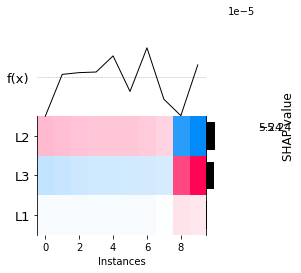

(10, 15, 3)
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


invalid value encountered in true_divide
invalid value encountered in true_divide


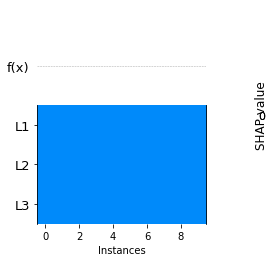

(10, 15, 3)
[[ 1.71516985e-06  1.62014180e-04 -1.63729349e-04]
 [-1.44082679e-05  3.31890425e-04 -3.17482157e-04]
 [-6.49393651e-06  4.00992864e-04 -3.94498927e-04]
 [ 5.71283123e-06  1.97203473e-04 -2.02916304e-04]
 [ 2.29053492e-06  1.57586198e-04 -1.59876733e-04]
 [-2.10742108e-05  3.21101925e-04 -3.00027714e-04]
 [ 2.81077979e-05 -5.32297821e-04  5.04190024e-04]
 [-5.44160659e-06 -4.00440931e-04  4.05882538e-04]
 [ 5.18669723e-06 -4.05167545e-04  3.99980848e-04]
 [ 4.34073024e-06 -3.16518357e-04  3.12177626e-04]]


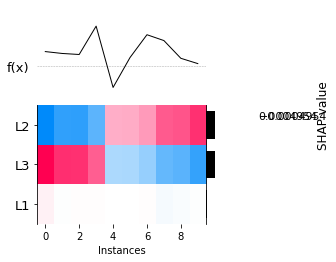

(10, 15, 3)
[[-5.41913751e-06  1.73091142e-04 -1.67672004e-04]
 [-1.83933269e-05  2.72527286e-04 -2.54133959e-04]
 [-5.18882170e-06  1.77436302e-04 -1.72247480e-04]
 [-5.09288041e-06  1.70217585e-04 -1.65124705e-04]
 [-5.89790367e-06  1.72800656e-04 -1.66902752e-04]
 [-1.04467486e-05  2.45019978e-04 -2.34573229e-04]
 [-2.84121050e-06 -1.70552939e-04  1.73394149e-04]
 [ 2.44569077e-05 -2.97918051e-04  2.73461143e-04]
 [ 2.77184468e-05 -2.29564362e-04  2.01845916e-04]
 [ 2.82240795e-06 -5.04055747e-04  5.01233339e-04]]


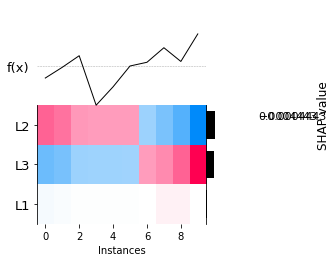

(10, 15, 3)
[[-5.93477491e-06  6.15252796e-05 -5.55905047e-05]
 [-4.97559950e-06  5.90619011e-05 -5.40863016e-05]
 [ 3.81442254e-06  4.32928947e-05 -4.71073172e-05]
 [-8.65011442e-06  1.18926649e-04 -1.10276535e-04]
 [ 6.80083618e-07  1.03878000e-04 -1.04558083e-04]
 [-1.07989793e-05  9.92228848e-05 -8.84239055e-05]
 [-1.19414565e-05  1.03289474e-04 -9.13480173e-05]
 [ 1.41937264e-05  1.89268839e-05 -3.31206102e-05]
 [-4.77674014e-06 -3.40818692e-04  3.45595432e-04]
 [ 1.65516993e-05 -2.79905972e-04  2.63354273e-04]]


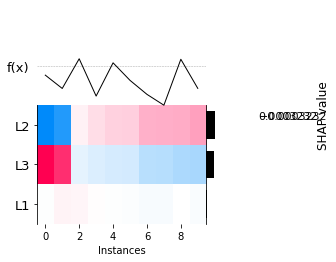

(10, 15, 3)
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


invalid value encountered in true_divide
invalid value encountered in true_divide


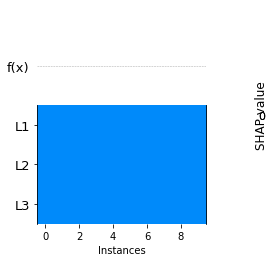

(10, 15, 3)
[[ 2.50093462e-05  3.49152822e-04 -3.74162168e-04]
 [-1.72562633e-05  7.73007702e-04 -7.55751439e-04]
 [-1.09337265e-05  7.33149021e-04 -7.22215294e-04]
 [-8.18573229e-05  6.67085743e-04 -5.85228420e-04]
 [ 1.04147756e-05 -4.02559087e-04  3.92144312e-04]
 [ 5.82485779e-05 -5.49850012e-04  4.91601434e-04]
 [ 2.71191506e-06 -2.98151559e-04  2.95439644e-04]
 [ 6.70261582e-06 -3.98830931e-04  3.92128316e-04]
 [-1.24305632e-05 -3.42450859e-04  3.54881422e-04]
 [ 2.09554919e-05 -5.41109269e-04  5.20153777e-04]]


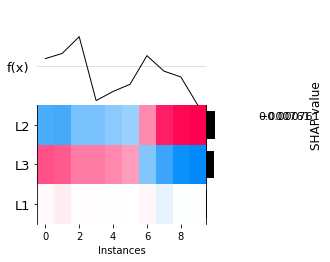

(10, 15, 3)
[[-2.41527131e-05  1.88749476e-04 -1.64596763e-04]
 [ 4.16902658e-06 -2.53014892e-05  2.11324626e-05]
 [ 2.31202354e-06 -2.35152715e-05  2.12032480e-05]
 [ 1.81828451e-06 -1.96786257e-05  1.78603412e-05]
 [ 3.38370299e-06 -2.57816494e-05  2.23979464e-05]
 [ 1.84699694e-06 -2.24260076e-05  2.05790107e-05]
 [ 2.10463255e-06 -2.31498173e-05  2.10451848e-05]
 [ 4.27316422e-06 -1.80289953e-05  1.37558311e-05]
 [ 3.95364169e-06 -1.49376628e-05  1.09840211e-05]
 [ 1.13831775e-06 -2.20932934e-05  2.09549756e-05]]


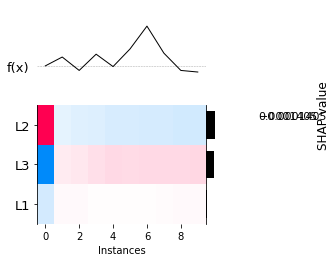

(10, 15, 3)
[[ 2.45824462e-06  3.08264355e-05 -3.32846801e-05]
 [-4.71078193e-06  8.25293853e-05 -7.78186034e-05]
 [-1.44754500e-06  8.72806741e-05 -8.58331291e-05]
 [-3.64371794e-06  8.86104887e-05 -8.49667708e-05]
 [ 1.51529761e-06  4.78877663e-05 -4.94030639e-05]
 [ 2.01572813e-06 -7.48412925e-05  7.28255643e-05]
 [ 1.61436330e-06 -6.62586601e-05  6.46442968e-05]
 [ 2.15898414e-06 -6.54334059e-05  6.32744218e-05]
 [ 5.43442432e-07 -5.92921460e-05  5.87487036e-05]
 [ 3.79506844e-07 -5.77303706e-05  5.73508637e-05]]


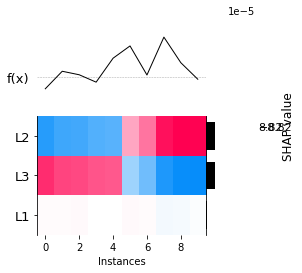

(10, 15, 3)
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


invalid value encountered in true_divide
invalid value encountered in true_divide


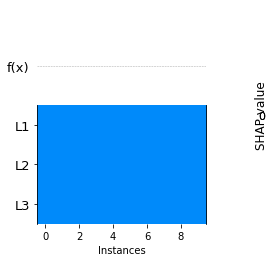

(10, 15, 3)
[[ 5.43405873e-05  6.84724884e-04 -7.39065471e-04]
 [ 2.94201169e-05  7.10274724e-04 -7.39694841e-04]
 [-2.66262949e-06  7.16137200e-04 -7.13474571e-04]
 [-1.11774430e-06  8.40682628e-04 -8.39564884e-04]
 [ 2.59075496e-05  9.73541946e-04 -9.99449495e-04]
 [-4.69855072e-05  1.66322716e-04 -1.19337209e-04]
 [-8.51279169e-05  1.85156317e-04 -1.00028400e-04]
 [-2.26983897e-05 -9.25770933e-04  9.48469323e-04]
 [ 4.35893434e-05 -1.58956384e-03  1.54597449e-03]
 [-1.15342074e-04 -1.21771150e-03  1.33305357e-03]]


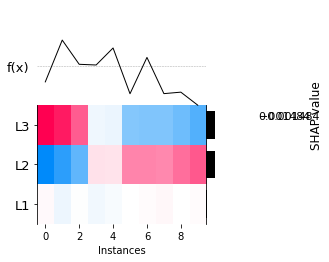

(10, 15, 3)
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


invalid value encountered in true_divide
invalid value encountered in true_divide


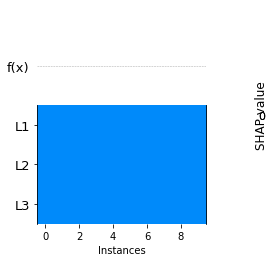

(10, 15, 3)
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


invalid value encountered in true_divide
invalid value encountered in true_divide


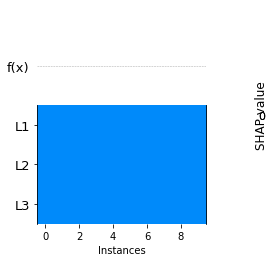

(10, 15, 3)
[[-5.87949790e-05  2.51427490e-04 -1.92632510e-04]
 [-5.29880406e-05  1.95555820e-04 -1.42567779e-04]
 [-5.51558782e-05  1.85186667e-04 -1.30030788e-04]
 [-5.37672615e-05  1.64957336e-04 -1.11190075e-04]
 [-2.89157142e-05  1.56029008e-04 -1.27113294e-04]
 [-3.33531570e-05  2.01334659e-04 -1.67981502e-04]
 [-3.01635306e-05  5.42517085e-05 -2.40881779e-05]
 [ 7.94576882e-05 -4.53738905e-04  3.74281217e-04]
 [ 1.94521411e-04 -4.38131485e-04  2.43610074e-04]
 [ 6.35315938e-06 -3.43431398e-04  3.37078239e-04]]


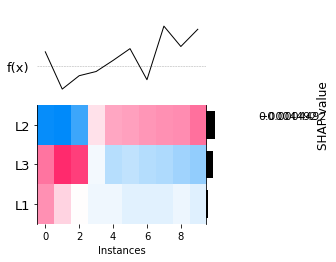

(10, 15, 3)
[[ 6.07134390e-05  1.07656635e-04 -1.68370074e-04]
 [ 1.43427661e-05  1.59145312e-04 -1.73488078e-04]
 [ 6.63376196e-05  6.52110765e-05 -1.31548696e-04]
 [ 9.59752601e-05  4.74548116e-05 -1.43430072e-04]
 [ 1.28589855e-05  2.41774127e-04 -2.54633112e-04]
 [ 3.73630985e-05  1.96650185e-04 -2.34013283e-04]
 [ 1.00479515e-04 -1.02257196e-04  1.77768155e-06]
 [ 8.24105661e-05 -8.03136745e-05 -2.09689162e-06]
 [-5.80988430e-04  1.17384049e-04  4.63604381e-04]
 [-6.30292353e-05 -6.76283526e-04  7.39312761e-04]]


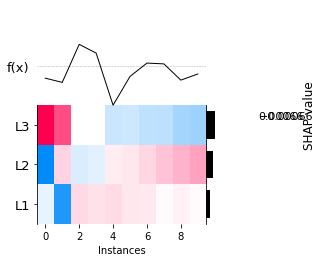

(10, 15, 3)
[[-1.55794231e-06  3.13254723e-05 -2.97675300e-05]
 [-3.67957173e-06  4.84543736e-05 -4.47748019e-05]
 [-1.98124802e-06  3.38238912e-05 -3.18426432e-05]
 [-3.16024886e-07 -1.85833638e-05  1.88993887e-05]
 [ 2.62584287e-07 -1.54834412e-05  1.52208569e-05]
 [ 5.95785412e-07 -2.02029535e-05  1.96071681e-05]
 [ 2.77933997e-06 -2.22582364e-05  1.94788964e-05]
 [ 2.47906152e-06 -1.28369202e-05  1.03578587e-05]
 [ 1.88059304e-06 -1.11432035e-05  9.26261046e-06]
 [-1.65907913e-07 -1.21074209e-05  1.22733288e-05]]


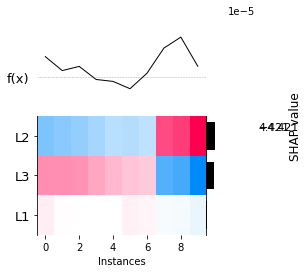

(10, 15, 3)
[[-1.97986782e-07  4.22788398e-06 -4.02989720e-06]
 [ 4.89855402e-07  6.11104261e-06 -6.60089801e-06]
 [-1.34637453e-07  4.02594070e-06 -3.89130325e-06]
 [-9.50024685e-07  1.16484993e-05 -1.06984747e-05]
 [-1.04563138e-06  1.26788450e-05 -1.16332136e-05]
 [-3.90560081e-07  1.13706388e-05 -1.09800787e-05]
 [ 1.02425204e-06  4.30664526e-06 -5.33089730e-06]
 [ 4.94976970e-07  7.50607607e-06 -8.00105304e-06]
 [ 1.29332898e-06 -1.57931290e-06  2.85983918e-07]
 [-3.30078732e-07 -6.07856938e-05  6.11157725e-05]]


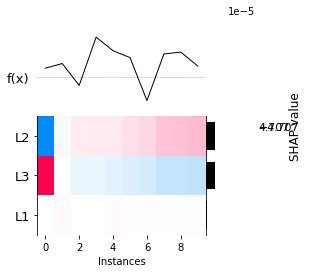

(10, 15, 3)
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


invalid value encountered in true_divide
invalid value encountered in true_divide


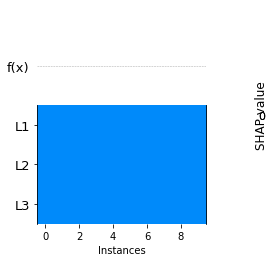

(10, 15, 3)
[[ 2.01599446e-05  1.99813742e-06 -2.21580820e-05]
 [ 1.64086081e-05 -2.59379727e-06 -1.38148108e-05]
 [ 2.88041661e-05 -1.84689589e-05 -1.03352072e-05]
 [ 1.77257414e-05 -8.84738633e-07 -1.68410028e-05]
 [ 1.33679956e-05  3.57787722e-07 -1.37257833e-05]
 [ 8.75643989e-06  2.76939223e-06 -1.15258321e-05]
 [ 1.09516955e-05 -1.44974428e-06 -9.50195126e-06]
 [ 3.07866978e-05 -4.38972833e-06 -2.63969695e-05]
 [ 2.16023199e-05  2.31216750e-07 -2.18335366e-05]
 [-1.54100379e-04 -2.04753424e-05  1.74575721e-04]]


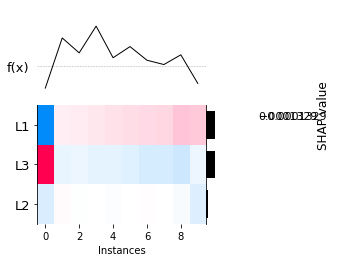

(10, 15, 3)
[[ 2.38123606e-04  2.84826826e-05 -2.66606289e-04]
 [-1.42200342e-05 -1.78967919e-05  3.21168262e-05]
 [-3.03161549e-05 -2.29235888e-06  3.26085138e-05]
 [-3.50024629e-05  1.01335865e-05  2.48688763e-05]
 [-2.65364450e-05 -4.34951019e-05  7.00315469e-05]
 [-2.95447179e-05 -4.04627241e-06  3.35909903e-05]
 [-2.57751649e-05 -6.69539316e-06  3.24705581e-05]
 [-2.22350560e-05 -1.59319796e-05  3.81670356e-05]
 [-1.84214618e-05  6.67601184e-06  1.17454499e-05]
 [-1.01837372e-05 -1.24203204e-05  2.26040576e-05]]


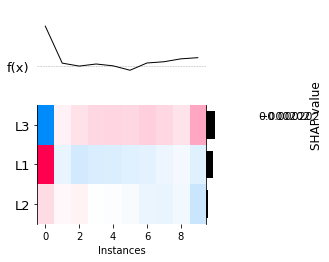

(10, 15, 3)
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


invalid value encountered in true_divide
invalid value encountered in true_divide


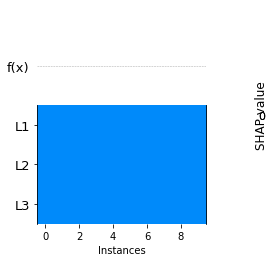

(10, 15, 3)
[[-4.43889883e-06  8.14092342e-05 -7.69703354e-05]
 [-9.13324406e-06  1.05185176e-04 -9.60519324e-05]
 [-1.72037547e-07 -1.85564720e-05  1.87285095e-05]
 [ 2.13794018e-06 -2.51780346e-05  2.30400944e-05]
 [ 6.76458186e-07 -2.47670506e-05  2.40905924e-05]
 [ 8.41129559e-07 -2.29409375e-05  2.20998079e-05]
 [ 2.37117030e-06 -3.22956918e-05  2.99245215e-05]
 [ 2.66590371e-06 -1.73376672e-05  1.46717635e-05]
 [ 4.35904973e-06 -2.30274673e-05  1.86684175e-05]
 [ 2.63990618e-06 -2.50250168e-05  2.23851106e-05]]


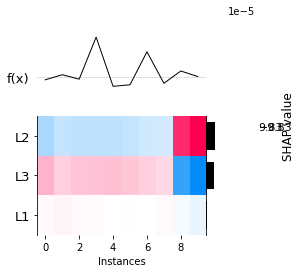

(10, 15, 3)
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


invalid value encountered in true_divide
invalid value encountered in true_divide


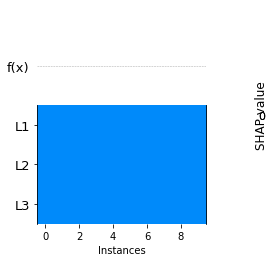

(10, 15, 3)
[[-1.29627011e-06  6.68541227e-04 -6.67244957e-04]
 [ 3.38233380e-05 -3.60667461e-05  2.24340804e-06]
 [-9.08504910e-06 -3.89523388e-05  4.80373879e-05]
 [-6.82620429e-06 -9.94767000e-05  1.06302904e-04]
 [-1.50483408e-05 -2.77242368e-05  4.27725776e-05]
 [ 7.36822403e-07 -1.05923508e-04  1.05186686e-04]
 [-3.87999918e-06 -1.04416276e-04  1.08296275e-04]
 [-8.31987826e-06 -9.67777708e-05  1.05097649e-04]
 [ 1.55178979e-06 -1.12858216e-04  1.11306426e-04]
 [-9.22815456e-06 -2.98123569e-05  3.90405115e-05]]


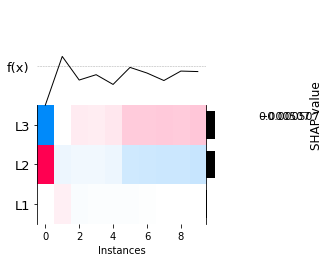

(10, 15, 3)
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


invalid value encountered in true_divide
invalid value encountered in true_divide


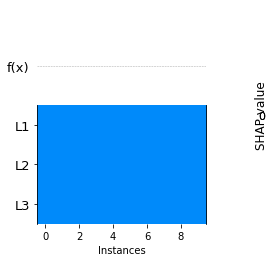

(10, 15, 3)
[[-4.82046809e-08  2.81602910e-04 -2.81554705e-04]
 [-4.39443608e-05  4.30928540e-04 -3.86984179e-04]
 [-8.87044452e-07  3.35905882e-04 -3.35018838e-04]
 [-3.34619568e-05  4.19568630e-04 -3.86106673e-04]
 [ 1.75884316e-05 -4.79486137e-04  4.61897706e-04]
 [ 1.15485583e-05 -1.88225957e-04  1.76677398e-04]
 [ 1.01989817e-05 -1.93102148e-04  1.82903167e-04]
 [ 1.20568768e-05 -1.76559391e-04  1.64502514e-04]
 [ 1.11850841e-05 -1.88964562e-04  1.77779478e-04]
 [ 1.18044414e-05 -1.64700655e-04  1.52896214e-04]]


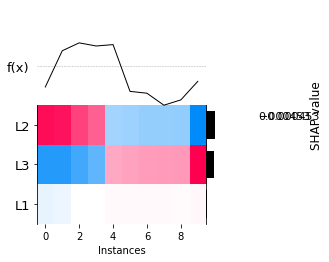

(10, 15, 3)
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


invalid value encountered in true_divide
invalid value encountered in true_divide


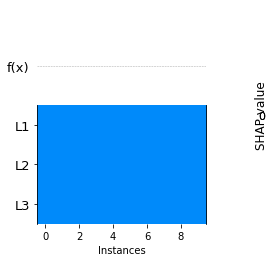

(10, 15, 3)
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


invalid value encountered in true_divide
invalid value encountered in true_divide


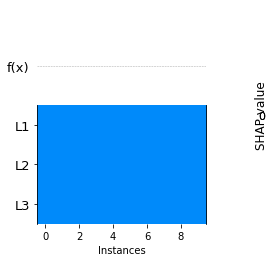

(10, 15, 3)
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


invalid value encountered in true_divide
invalid value encountered in true_divide


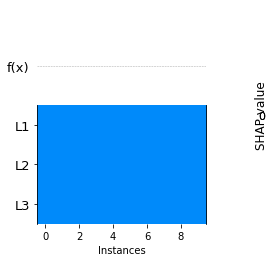

(10, 15, 3)
[[-2.44247620e-05  6.71123827e-05 -4.26876207e-05]
 [-7.29929391e-06  4.93360181e-05 -4.20367242e-05]
 [-1.07077962e-05  5.69133960e-05 -4.62055998e-05]
 [-3.65349398e-06  1.01487037e-05 -6.49520976e-06]
 [-5.96323403e-06  5.84489171e-05 -5.24856830e-05]
 [-6.96101202e-06  5.22679317e-05 -4.53069196e-05]
 [-8.08310538e-06  6.26397976e-05 -5.45566922e-05]
 [-1.29701234e-05  6.25709266e-05 -4.96008032e-05]
 [-1.00439720e-05  4.60063738e-05 -3.59624018e-05]
 [ 8.84272622e-05 -4.66585221e-04  3.78157959e-04]]


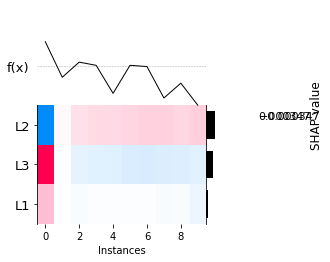

(10, 15, 3)
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


invalid value encountered in true_divide
invalid value encountered in true_divide


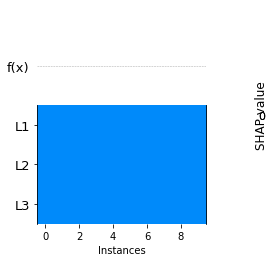

(10, 15, 3)
[[-2.57889118e-05  6.08236416e-04 -5.82447504e-04]
 [-6.86190830e-05  6.75277318e-04 -6.06658234e-04]
 [-8.13948838e-05  7.22467897e-04 -6.41073013e-04]
 [-7.06364764e-05  7.86961525e-04 -7.16325048e-04]
 [-2.02249043e-05  5.39525658e-04 -5.19300754e-04]
 [-9.12509591e-05  8.46189832e-04 -7.54938873e-04]
 [-4.07445217e-05  8.45371993e-04 -8.04627471e-04]
 [ 3.70851393e-05 -1.41629548e-03  1.37921034e-03]
 [ 3.00265892e-04 -1.63147529e-03  1.33120940e-03]
 [ 4.36980768e-05 -1.82687944e-03  1.78318136e-03]]


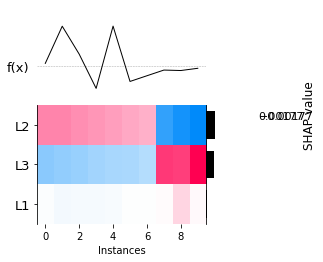

(10, 15, 3)
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


invalid value encountered in true_divide
invalid value encountered in true_divide


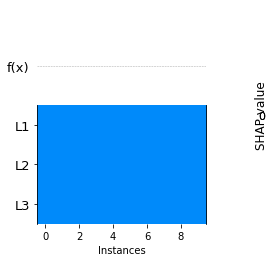

(10, 15, 3)
[[-1.29187118e-05  1.34395916e-04 -1.21477204e-04]
 [-2.78565683e-06  1.30140838e-04 -1.27355181e-04]
 [-1.36498830e-05  1.25558476e-04 -1.11908593e-04]
 [-4.95440554e-06  1.15540875e-04 -1.10586470e-04]
 [-1.33537666e-05  1.30441168e-04 -1.17087401e-04]
 [ 3.58269815e-06  8.56822821e-05 -8.92649803e-05]
 [-6.78395365e-08  9.10654385e-05 -9.09975990e-05]
 [-6.74401146e-06  1.58642993e-04 -1.51898981e-04]
 [ 1.05994890e-05 -3.44606752e-04  3.34007263e-04]
 [ 3.82604237e-05 -6.31732300e-04  5.93471876e-04]]


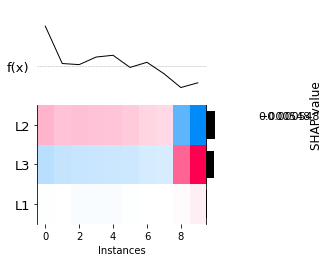

(10, 15, 3)
[[ 4.89280916e-04  7.77656663e-04 -1.26693758e-03]
 [ 3.60785889e-04  1.35192377e-03 -1.71270966e-03]
 [ 6.23187413e-04  1.04584705e-03 -1.66903446e-03]
 [ 4.80867661e-04  1.22993133e-03 -1.71079899e-03]
 [ 4.13536914e-04 -3.39525387e-04 -7.40115270e-05]
 [-4.73416834e-04  1.14636485e-04  3.58780349e-04]
 [-2.28275354e-04 -2.63604941e-04  4.91880295e-04]
 [-1.08842961e-03  2.01624828e-04  8.86804779e-04]
 [-1.90177958e-04 -1.51207775e-03  1.70225571e-03]
 [-9.80311714e-05 -2.60324986e-03  2.70128103e-03]]


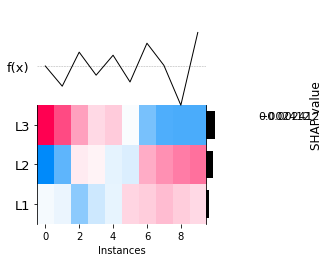

(10, 15, 3)
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


invalid value encountered in true_divide
invalid value encountered in true_divide


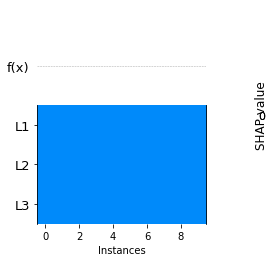

(10, 15, 3)
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


invalid value encountered in true_divide
invalid value encountered in true_divide


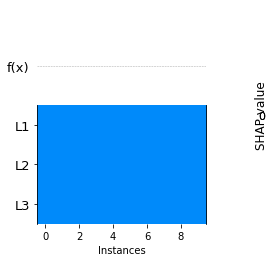

(10, 15, 3)
[[-3.34228205e-07  1.85599915e-05 -1.82257633e-05]
 [-8.15580282e-08  1.58814342e-05 -1.57998761e-05]
 [-4.69836923e-06  3.11410789e-05 -2.64427097e-05]
 [-2.64307857e-06  2.79814505e-05 -2.53383719e-05]
 [ 2.08367299e-06 -2.02496188e-05  1.81659458e-05]
 [ 1.12225269e-06 -1.75464963e-05  1.64242437e-05]
 [ 4.17157510e-07 -1.30110915e-05  1.25939340e-05]
 [ 6.30309947e-07 -1.51458398e-05  1.45155298e-05]
 [ 3.99135051e-07 -1.15399279e-05  1.11407928e-05]
 [ 3.11926002e-06 -1.77454582e-05  1.46261981e-05]]


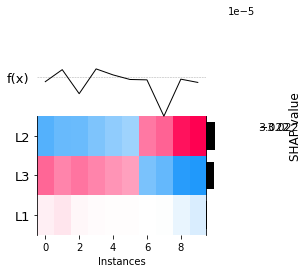

(10, 15, 3)
[[-1.24410104e-05  1.57542931e-04 -1.45101920e-04]
 [ 2.06712008e-07  1.10575731e-04 -1.10782443e-04]
 [-5.13211004e-08  1.38948184e-04 -1.38896863e-04]
 [-2.33566217e-05  1.61455919e-04 -1.38099298e-04]
 [-1.42754536e-05  1.32993906e-04 -1.18718453e-04]
 [ 1.02373405e-05 -2.01304053e-04  1.91066713e-04]
 [ 1.44049564e-05 -1.57334019e-04  1.42929062e-04]
 [ 1.10309693e-05 -1.64203798e-04  1.53172829e-04]
 [ 7.98572045e-06 -9.78759313e-05  8.98902108e-05]
 [ 8.13009341e-06 -1.04814700e-04  9.66846070e-05]]


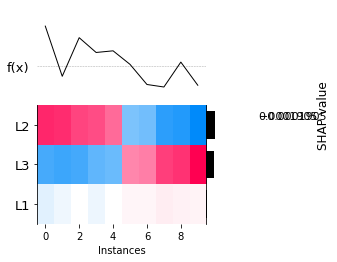

(10, 15, 3)
[[-9.88179213e-06  2.82795041e-04 -2.72913249e-04]
 [-4.85389147e-05  4.60504427e-04 -4.11965513e-04]
 [-5.32813915e-05  3.96030308e-04 -3.42748917e-04]
 [ 2.72956939e-05 -1.98845372e-04  1.71549678e-04]
 [ 2.14529221e-05 -1.56459552e-04  1.35006630e-04]
 [ 8.07621301e-06 -1.47565566e-04  1.39489353e-04]
 [ 1.20393087e-05 -1.33835066e-04  1.21795757e-04]
 [ 7.82291482e-06 -1.44321692e-04  1.36498777e-04]
 [ 1.46204386e-05 -1.42799156e-04  1.28178718e-04]
 [ 2.95937411e-05 -2.28003943e-04  1.98410202e-04]]


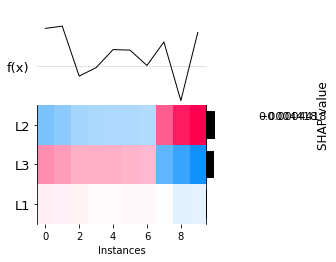

(10, 15, 3)
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


invalid value encountered in true_divide
invalid value encountered in true_divide


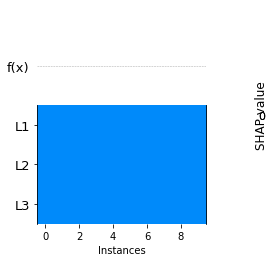

(10, 15, 3)
[[-8.65294142e-05  5.98434746e-04 -5.11905332e-04]
 [-2.22303753e-05  6.07870427e-04 -5.85640052e-04]
 [ 2.63904340e-05 -1.85077288e-04  1.58686855e-04]
 [ 6.49777296e-06 -1.30276638e-04  1.23778865e-04]
 [ 5.90810429e-06 -1.27546374e-04  1.21638270e-04]
 [ 2.96383273e-05 -1.90191686e-04  1.60553359e-04]
 [ 5.70466131e-06 -1.29797983e-04  1.24093322e-04]
 [ 1.76915409e-06 -1.18049230e-04  1.16280076e-04]
 [ 8.22147173e-06 -1.60112619e-04  1.51891148e-04]
 [ 2.19206098e-05 -1.19867703e-04  9.79470927e-05]]


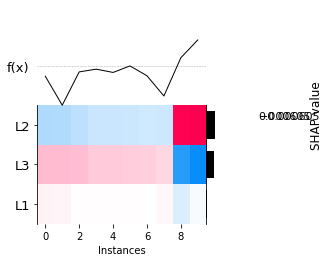

(10, 15, 3)
[[ 5.36341968e-05  2.42280088e-04 -2.95914285e-04]
 [-2.07662225e-05  6.05361072e-04 -5.84594850e-04]
 [ 4.69665378e-05  4.53374897e-04 -5.00341435e-04]
 [-3.67053606e-05  5.02758502e-04 -4.66053142e-04]
 [-1.13480391e-04  2.00150283e-05  9.34653624e-05]
 [ 9.98804184e-06 -4.00099408e-04  3.90111366e-04]
 [-2.38604573e-06 -2.31894705e-04  2.34280751e-04]
 [-1.56488661e-06 -3.30415206e-04  3.31980092e-04]
 [ 3.86054524e-06 -3.20610681e-04  3.16750136e-04]
 [ 3.15812540e-05 -4.97960309e-04  4.66379055e-04]]


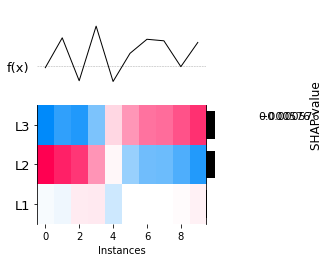

(10, 15, 3)
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


invalid value encountered in true_divide
invalid value encountered in true_divide


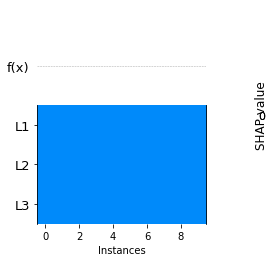

(10, 15, 3)
[[-2.05635622e-05  4.90124695e-04 -4.69561133e-04]
 [-8.92560098e-06  3.78630126e-04 -3.69704525e-04]
 [ 1.59443734e-05  2.85123741e-04 -3.01068115e-04]
 [ 2.03165361e-05  2.57925332e-04 -2.78241868e-04]
 [-1.90866071e-05  4.75759764e-04 -4.56673157e-04]
 [-7.11716149e-05  4.46901334e-04 -3.75729720e-04]
 [-4.14623587e-05  4.39632563e-04 -3.98170205e-04]
 [ 1.09198809e-04 -1.41293769e-03  1.30373888e-03]
 [ 6.15849822e-06 -5.17963006e-04  5.11804508e-04]
 [-3.54276782e-06 -8.58981019e-04  8.62523787e-04]]


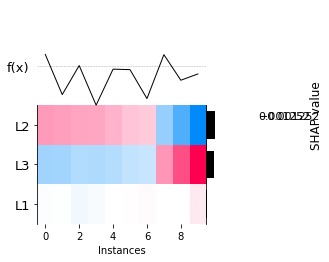

(10, 15, 3)
[[-1.30950135e-05  2.47868851e-04 -2.34773837e-04]
 [-1.21278400e-05  4.16093557e-04 -4.03965717e-04]
 [-2.81836704e-05 -4.50407829e-05  7.32244533e-05]
 [ 7.34868991e-05 -1.78027356e-04  1.04540457e-04]
 [ 6.67791189e-06 -9.58344232e-05  8.91565114e-05]
 [ 4.44053832e-06 -9.09849110e-05  8.65443727e-05]
 [ 2.77237344e-06 -8.26499055e-05  7.98775321e-05]
 [ 1.65996388e-06 -8.28617741e-05  8.12018102e-05]
 [-3.42537995e-06 -5.45549986e-05  5.79803786e-05]
 [-2.39223591e-07 -7.85973696e-05  7.88365932e-05]]


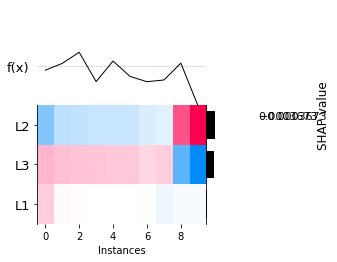

(10, 15, 3)
[[-7.09696438e-05  4.01342608e-04 -3.30372964e-04]
 [-5.56837066e-06  1.54948211e-04 -1.49379841e-04]
 [ 1.01549401e-06  1.32531240e-04 -1.33546734e-04]
 [-1.11352744e-05  9.09590012e-05 -7.98237268e-05]
 [-3.93541266e-06  1.58741462e-04 -1.54806049e-04]
 [-1.09607331e-08  1.25025245e-04 -1.25014284e-04]
 [-3.88728308e-05  1.98681729e-04 -1.59808898e-04]
 [-7.50522301e-07 -2.07184219e-04  2.07934741e-04]
 [ 4.88025627e-05 -5.07275446e-04  4.58472884e-04]
 [ 7.73845740e-05 -5.36132613e-04  4.58748040e-04]]


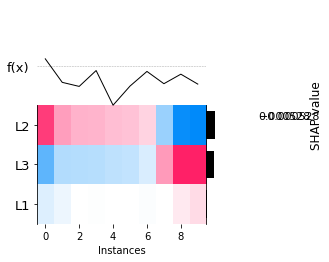

(10, 15, 3)
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


invalid value encountered in true_divide
invalid value encountered in true_divide


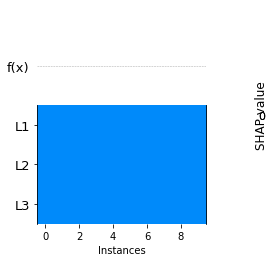

(10, 15, 3)
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


invalid value encountered in true_divide
invalid value encountered in true_divide


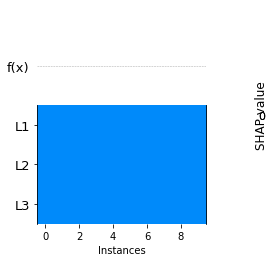

(10, 15, 3)
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


invalid value encountered in true_divide
invalid value encountered in true_divide


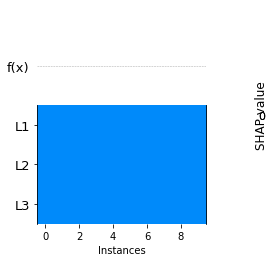

(10, 15, 3)
[[-3.41142828e-05  1.30626109e-04 -9.65118267e-05]
 [-4.16252637e-05  2.06345185e-04 -1.64719921e-04]
 [-4.15869703e-05  1.38194755e-04 -9.66077850e-05]
 [-2.11399211e-05  1.45917578e-04 -1.24777657e-04]
 [-2.25596944e-05  2.02130710e-04 -1.79571016e-04]
 [-4.10757686e-05  1.57110664e-04 -1.16034896e-04]
 [ 6.58364350e-05 -2.11258672e-04  1.45422236e-04]
 [ 6.64630681e-05 -2.09886300e-04  1.43423232e-04]
 [ 3.31229609e-05 -2.75151638e-04  2.42028677e-04]
 [ 4.14994561e-05 -3.01570856e-04  2.60071400e-04]]


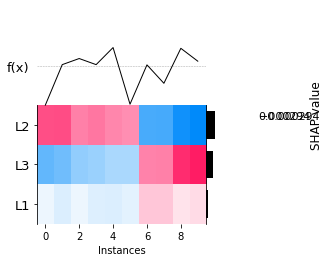

(10, 15, 3)
[[-1.19144192e-04  2.10167802e-03 -1.98253383e-03]
 [-5.64422089e-04  2.97710063e-03 -2.41267854e-03]
 [-6.84399468e-06 -4.84131822e-04  4.90975816e-04]
 [ 1.61395304e-04 -7.22878406e-04  5.61483102e-04]
 [ 2.74008483e-05 -4.52905195e-04  4.25504347e-04]
 [ 3.21877441e-05 -6.19183336e-04  5.86995592e-04]
 [ 2.92560075e-05 -5.29512569e-04  5.00256561e-04]
 [ 1.32142814e-04 -9.19151542e-04  7.87008728e-04]
 [ 1.35991859e-04 -7.32777401e-04  5.96785542e-04]
 [ 1.45604166e-04 -7.82868510e-04  6.37264344e-04]]


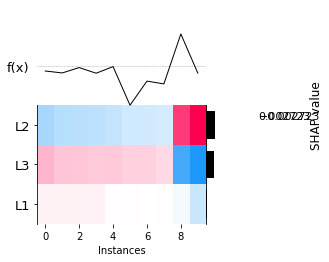

(10, 15, 3)
[[-2.45139332e-06  3.66090591e-05 -3.41576658e-05]
 [-2.63474163e-07  2.95404008e-05 -2.92769266e-05]
 [ 9.01895122e-08  3.08991370e-05 -3.09893266e-05]
 [-3.63954016e-06  3.91933815e-05 -3.55538413e-05]
 [-3.50818069e-06  3.69612555e-05 -3.34530749e-05]
 [-3.36150366e-06  4.45436926e-05 -4.11821890e-05]
 [-3.26776759e-06  4.48872283e-05 -4.16194607e-05]
 [-4.61806264e-07  3.44870195e-05 -3.40252132e-05]
 [-5.95907779e-07  3.26981147e-05 -3.21022069e-05]
 [ 1.62733984e-05 -3.34455565e-04  3.18182167e-04]]


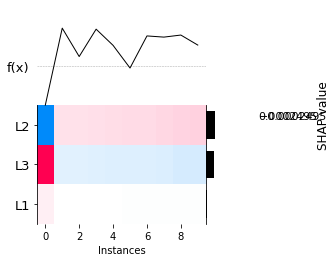

(10, 15, 3)
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


invalid value encountered in true_divide
invalid value encountered in true_divide


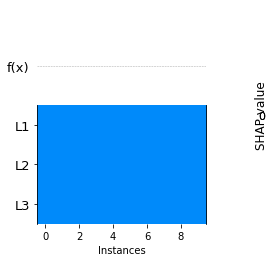

(10, 15, 3)
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


invalid value encountered in true_divide
invalid value encountered in true_divide


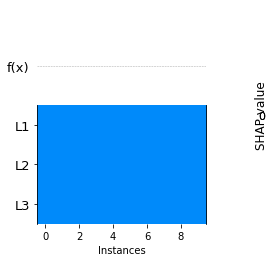

(10, 15, 3)
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


invalid value encountered in true_divide
invalid value encountered in true_divide


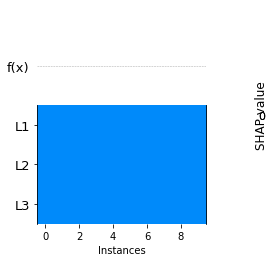

(10, 15, 3)
[[-2.27880571e-04  8.76276531e-04 -6.48395960e-04]
 [ 1.99802423e-05 -8.13806711e-05  6.14004288e-05]
 [ 2.54940634e-05 -1.26458888e-04  1.00964825e-04]
 [ 1.81635272e-05 -1.02240015e-04  8.40764880e-05]
 [ 3.68339907e-05 -8.50068976e-05  4.81729070e-05]
 [ 1.67088059e-05 -1.44434207e-04  1.27725401e-04]
 [ 3.34639986e-05 -7.16852714e-05  3.82212728e-05]
 [ 2.51238772e-05 -1.20472139e-04  9.53482613e-05]
 [ 3.93718336e-05 -9.72495603e-05  5.78777267e-05]
 [ 1.51629609e-05 -9.48837349e-05  7.97207740e-05]]


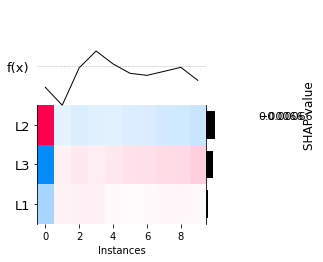

(10, 15, 3)
[[-5.35676199e-05  5.84780826e-04 -5.31213206e-04]
 [-4.49361007e-05  6.13898854e-04 -5.68962753e-04]
 [-5.83003698e-05  5.99844110e-04 -5.41543740e-04]
 [ 7.84259718e-06  3.52063698e-04 -3.59906295e-04]
 [ 5.27983685e-05 -4.20762939e-04  3.67964570e-04]
 [ 2.10265618e-06 -2.93694144e-04  2.91591488e-04]
 [ 5.86789841e-05 -4.01111172e-04  3.42432188e-04]
 [ 2.52898596e-06 -2.46125129e-04  2.43596143e-04]
 [ 2.55670512e-05 -4.60356270e-04  4.34789219e-04]
 [ 2.72219557e-06 -3.08700490e-04  3.05978295e-04]]


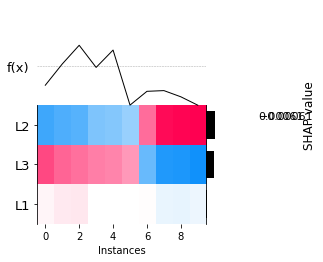

(10, 15, 3)
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


invalid value encountered in true_divide
invalid value encountered in true_divide


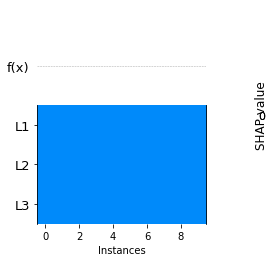

(10, 15, 3)
[[ 5.60118399e-05  7.93783350e-04 -8.49795190e-04]
 [-1.80630142e-04  2.08534856e-03 -1.90471842e-03]
 [ 7.02753276e-05  7.66728063e-04 -8.37003390e-04]
 [ 3.04904798e-04  1.55639874e-04 -4.60544671e-04]
 [-4.09031109e-05 -6.62920696e-04  7.03823807e-04]
 [ 1.84988157e-04 -1.11819535e-03  9.33207194e-04]
 [-4.50131822e-05 -5.43834884e-04  5.88848066e-04]
 [-5.01973687e-05 -4.15114215e-04  4.65311584e-04]
 [-1.38810856e-04 -6.93350665e-04  8.32161520e-04]
 [-9.69998188e-05 -4.22462044e-04  5.19461863e-04]]


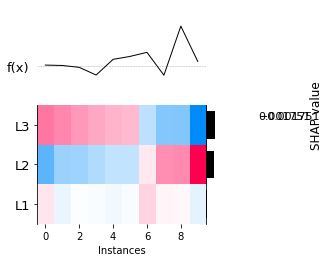

(10, 15, 3)
[[-5.83779590e-06  5.26159737e-05 -4.67781778e-05]
 [-8.36813455e-08  3.13460613e-05 -3.12623800e-05]
 [-6.60276036e-06  5.77396790e-05 -5.11369186e-05]
 [-4.94176231e-07  3.75270920e-05 -3.70329158e-05]
 [-2.30050459e-07  3.96556143e-05 -3.94255639e-05]
 [-4.21091145e-06  5.61561553e-05 -5.19452439e-05]
 [-4.36413743e-07  4.08326419e-05 -4.03962282e-05]
 [-5.87832095e-07  3.69870897e-05 -3.63992576e-05]
 [-7.11099727e-07 -1.05501962e-04  1.06213062e-04]
 [ 1.94213268e-05 -2.56437746e-04  2.37016420e-04]]


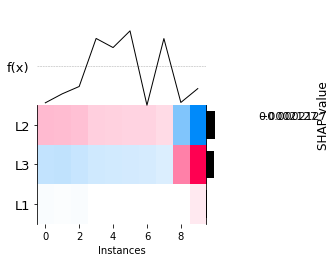

(10, 15, 3)
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


invalid value encountered in true_divide
invalid value encountered in true_divide


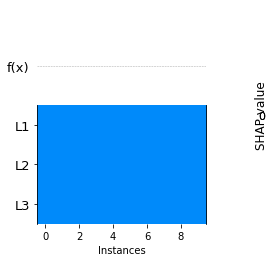

(10, 15, 3)
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


invalid value encountered in true_divide
invalid value encountered in true_divide


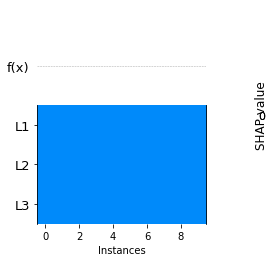

(10, 15, 3)
[[ 1.00213900e-04  1.30717704e-03 -1.40739094e-03]
 [-2.91573060e-04  2.69649322e-03 -2.40492016e-03]
 [ 4.59203577e-04  7.42288430e-05 -5.33432420e-04]
 [ 4.06125049e-04  8.90931966e-05 -4.95218246e-04]
 [-2.18922055e-04 -1.00611944e-03  1.22504149e-03]
 [-2.76520607e-05 -8.29801660e-04  8.57453721e-04]
 [ 3.55751833e-05 -1.22034416e-03  1.18476897e-03]
 [-2.47302787e-04 -5.29918860e-04  7.77221647e-04]
 [-3.65663420e-04 -5.33112553e-04  8.98775972e-04]
 [-8.17605845e-05 -7.63011433e-04  8.44772017e-04]]


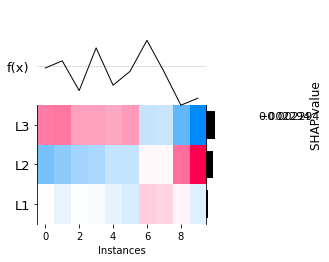

(10, 15, 3)
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


invalid value encountered in true_divide
invalid value encountered in true_divide


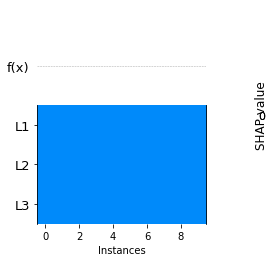

(10, 15, 3)
[[-5.18337703e-06  2.67196229e-04 -2.62012852e-04]
 [-1.23896409e-05  2.90540784e-04 -2.78151143e-04]
 [-1.21776852e-05  2.26910669e-04 -2.14732984e-04]
 [-6.78347220e-07  1.90074293e-04 -1.89395946e-04]
 [-2.76789047e-05  1.95238515e-04 -1.67559611e-04]
 [-2.58702711e-05  2.05252953e-04 -1.79382682e-04]
 [ 1.54385762e-05 -2.44235643e-04  2.28797067e-04]
 [ 2.34795786e-05 -4.93845554e-04  4.70365976e-04]
 [ 2.03517192e-05 -3.20403713e-04  3.00051994e-04]
 [ 1.89335160e-05 -2.55092121e-04  2.36158605e-04]]


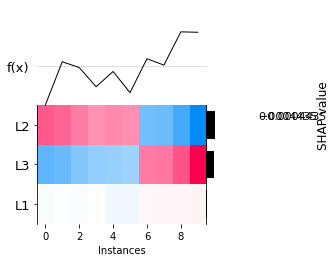

(10, 15, 3)
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


invalid value encountered in true_divide
invalid value encountered in true_divide


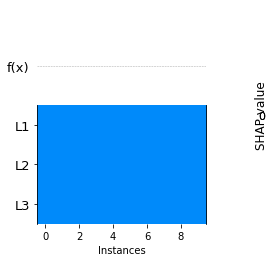

(10, 15, 3)
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


invalid value encountered in true_divide
invalid value encountered in true_divide


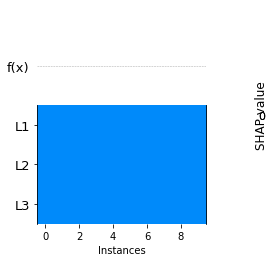

(10, 15, 3)
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


invalid value encountered in true_divide
invalid value encountered in true_divide


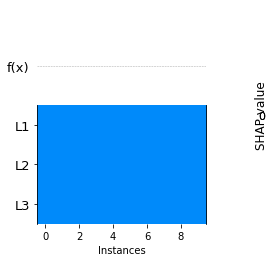

(10, 15, 3)
[[-3.05388013e-04  1.41810021e-03 -1.11271220e-03]
 [-4.46476467e-05  1.18878567e-03 -1.14413802e-03]
 [ 4.29155397e-05  1.26875670e-03 -1.31167224e-03]
 [-2.28306623e-04  1.66240758e-03 -1.43410096e-03]
 [ 4.33621906e-05  7.93162119e-04 -8.36524310e-04]
 [ 2.75941662e-05 -9.29407978e-04  9.01813812e-04]
 [ 5.88311787e-05 -9.60028612e-04  9.01197434e-04]
 [-2.45235427e-05 -1.28172009e-03  1.30624364e-03]
 [ 2.24844841e-04 -1.62089647e-03  1.39605163e-03]
 [ 2.61653732e-04 -1.65067905e-03  1.38902532e-03]]


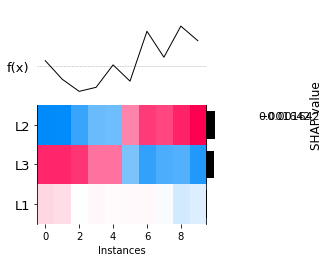

(10, 15, 3)
[[ 1.43472035e-04  7.89822437e-03 -8.04169640e-03]
 [ 5.59818575e-04  2.86274241e-03 -3.42256099e-03]
 [ 9.26233806e-04  2.09041693e-03 -3.01665073e-03]
 [-2.58348099e-04  6.74679307e-03 -6.48844497e-03]
 [ 2.71124851e-04 -8.21904540e-04  5.50779690e-04]
 [ 1.24083545e-04 -7.65157642e-05 -4.75677804e-05]
 [-3.08571070e-04 -3.90963360e-03  4.21820467e-03]
 [-2.41667512e-04 -3.31536598e-03  3.55703349e-03]
 [-2.31270633e-04 -6.67070308e-03  6.90197371e-03]
 [-4.42383616e-04 -4.07265251e-03  4.51503613e-03]]


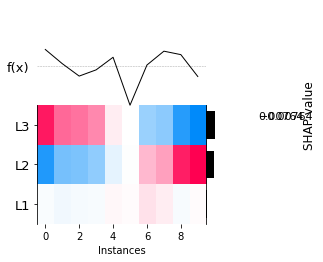

(10, 15, 3)
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


invalid value encountered in true_divide
invalid value encountered in true_divide


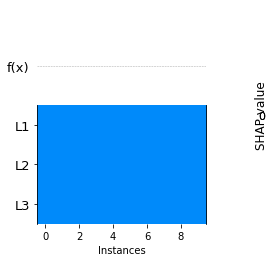

(10, 15, 3)
[[ 8.30060016e-07  4.07509147e-05 -4.15809747e-05]
 [-3.32575723e-06  5.79649835e-05 -5.46392263e-05]
 [-3.62690068e-06  4.97610500e-05 -4.61341493e-05]
 [-5.24901688e-06  5.69650987e-05 -5.17160818e-05]
 [-4.86683630e-06  5.54389056e-05 -5.05720693e-05]
 [-2.01371955e-06  4.78063428e-05 -4.57926232e-05]
 [ 1.68224129e-07  3.28570619e-05 -3.30252860e-05]
 [-5.42376570e-07  4.15831861e-05 -4.10408095e-05]
 [ 1.24932953e-05 -2.41113650e-04  2.28620355e-04]
 [ 4.41716310e-06 -1.09991340e-04  1.05574177e-04]]


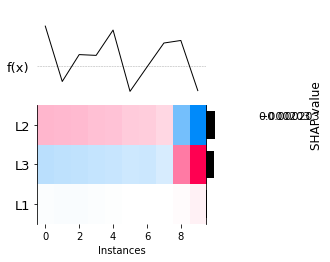

(10, 15, 3)
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


invalid value encountered in true_divide
invalid value encountered in true_divide


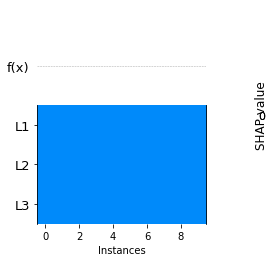

(10, 15, 3)
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


invalid value encountered in true_divide
invalid value encountered in true_divide


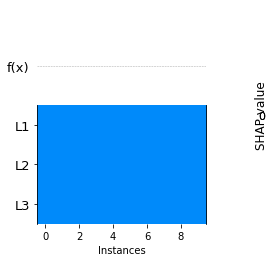

In [73]:
#model = torch.load('../../stages/final_2/cache_agent/2/D3QN_q_eval.pth')
#torch.set_grad_enabled(True)
#X,_,feature_names = load_data("./cache.csv",1000)

size_index = feature_names.index("service_size")
for i in range(len(X)):
    for j in range(len(X)-i-1):
        if X[j][size_index] > X[j+1][size_index]:
            X[j],X[j+1] = X[j+1],X[j]


def show(shap_values):
    t = np.array(shap_values)
    print(t.shape)
    #只留下size的shap值
    t = t[:,size_index,:]
    print(t)
    shap_exp = shap.Explanation(values=t,
                                base_values=0,
                                data=np.zeros_like(t),
                                feature_names=["L1","L2","L3"])
    shap.plots.heatmap(shap_exp,show=True)
    #plt.savefig(f'./screenshot/size_ralated_cache_agent.png',dpi = 150,bbox_inches = 'tight')

window_size = 10
start = 0
end = start + window_size
while end<=len(X):
    data = np.array(X[start:end])
    explainer = shap.Explainer(lambda x: model.predict_proba(x), data)
    shap_values = explainer(data).values
    show(shap_values)
    start += window_size
    end += window_size

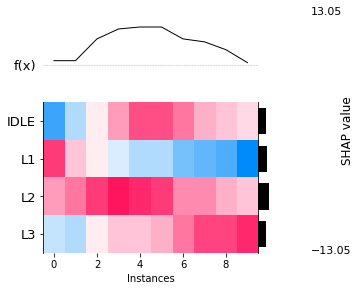

In [96]:
IDLE = [-10,-4,1,5,9,9,7,4,3,2]
L1 = [10,3,1,-2,-4,-4,-7,-8,-9,-15]
L2 = [5,7,10,12,11,10,6,6,4,3]
L3 = [-3,-4,1,3,3,4,7,9.5,9.52,11]
t = [IDLE,L1,L2,L3]
t = np.array(t)
t = t.T

shap_exp = shap.Explanation(values=np.array(t),
                            base_values=0,
                            data=np.zeros_like(t),
                            feature_names=["IDLE", "L1", "L2", "L3"])

shap.plots.heatmap(shap_exp, show=False,instance_order=[I for I in range(10)],feature_order=[I for I in range(4)])
plt.savefig(f'./screenshot/size_ralated_cache_agent.png',dpi = 150,bbox_inches = 'tight')

## maintianance agent

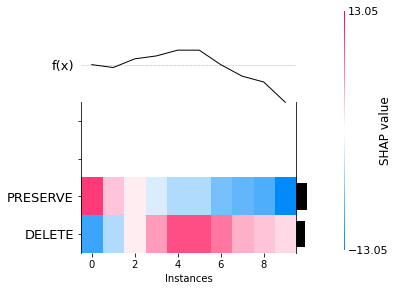

In [98]:
PRESERVE = [10,3,1,-2,-4,-4,-7,-8,-9,-15]
DELETE = [-10,-4,1,5,9,9,7,4,3,2]
NULL = [0,0,0,0,0,0,0,0,0,0] #PLACEHOLDER
t = [NULL,NULL,PRESERVE,DELETE]
t = np.array(t)
t = t.T

shap_exp = shap.Explanation(values=np.array(t),
                            base_values=0,
                            data=np.zeros_like(t),
                            feature_names=["","","PRESERVE","DELETE"])

shap.plots.heatmap(shap_exp, show=False,instance_order=[I for I in range(10)],feature_order=[I for I in range(4)])
plt.savefig(f'./screenshot/size_ralated_maintainance_agent.png',dpi = 150,bbox_inches = 'tight')